# Algorithms

Content Based
- based on attributes of items / users. Doesn't take into consideration behavior or interations of different users or visitors. The only thing you can use is other attributes of products. Very limitting. Not able to recommend you something that is completely different, just recommends you something that is 'similar' that you have been interativing with in the past. 


Collaborative Filtering
- more powerful since it can help you explore diverse content based on other similar users. Collaborative methods work with the interaction matrix that can also be called rating matrix in the rare case when users provide explicit rating of items. 


User based k-Nearest Neighbors
- use cosine similarity, Jaccard similarity, etc. (correlation similarity) of rows (users) or columns (items) and recommends items that k — nearest neighbors enjoyed. 
- Lazy algorithm. Tough to scale 


Matrix Factorization
- Matrix factorization attempts to reduce dimensionality of the interaction matrix (rating matrix) and approximate it by two or more small matrices (q and p) with k latent components. The Matrix Factorization techniques are usually more effective, because they allow users to discover the latent (hidden)features underlying the interactions between users and items (books). Takes into account ratings for individual users. For example, if one user always gives higher ratings or low ratings, this algorithm can take this into account and make a relative contribution to the system.
- Optimizations
 - stochastic gradient descent. Most popular training algorithm is a stochastic gradient descent minimizing loss by gradient updates of both columns and rows of p a q matrices. The p and q matrixes are updated independently 
 - ALS. Alternating Least Squares method that iteratively optimizes matrix p and matrix q by general least squares step. Iterily, fix P and optimize q, fix q and optimize p, etc... Need like 10 iterations. 
 
 
Association rules
- Association rules can also be used for recommendation. Items that are frequently consumed together are connected with an edge in the graph. You can see clusters of best sellers (densely connected items that almost everybody interacted with) and small separated clusters of niche content. Mining rules is not very scalable. The APRIORI algorithm explores the state space of possible frequent itemsets and eliminates branches of the search space, that are not frequent. Frequent itemsets are used to generate rules and these rules generate recommendations.

Neural Network
- Can use auto-encoder to reconstruct the information (bottleneck), typically smaller size, same number of inputs and outputs. The benefit of this over basic Matrix Factorization is that we can have multiple layer for interations and can model non-lineararities. This can be used as the rating matrix then another algorithm can be run on top (KNN). 
- Nice because you can use both Content Based and Collaborative Filtering in one hybrid algorithm. As you can train auto-encoder to encode attributes, then you perform matrix factorization on interations and you train it together. 

# Metrics

The actual 'ranking' of the model is not the main goal (only in acedimia). Ideally there is no 'correct' or 'ideal' metric in recommender systems. A business is ideally trying to optimizer it revenue or proxy for it, such as clicks, revenue, impressions, etc... Therefore in the real world we should A/B test the top results to determine what suits the business more. 


#### Online Testing 
The only way to determine is my deploying your algorithm and collecting data based on how users behave. Explore - exploit delemmma. Put recommendations in front of different users and measure if they buy, watch, or have interest in the recommendations you have presented. 
- Surragate problem

At the end of the day, the only evaluation metric that matters is the results from your online A/B testing. 

Need to consider 'surprise' and 'diversity'. 


#### Offline Testing 
Root Mean Squared Error
- The typical metric for recommender systems. How far off is the prediction. Punishes larger errors more. 
- Netfix (couldn't use it in the real world)


Precision / Recall on top-N
- Since you are showing a list of books that are recommended, how many of them are irrelevant
- precision -- Precision at k is the proportion of recommended books in the top-k set that are relevant. Its interpretation is as follows. Suppose that my precision at 10 in a top-10 recommendation problem is 80%. This means that 80% of the recommendation I make are relevant to the user.

Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k).

- recall -- Recall at k is the proportion of relevant items found in the top-k recommendations. Suppose that we computed recall at 10 and found it is 40% in our top-10 recommendation system. This means that 40% of the total number of the relevant items appear in the top-k results.

Recall@k = (# of recommended items @k that are relevant) / (total # of relevant items)


Discounted Comulitve Gain
- DCG takes also the position into consideration assuming that relevance of items logarithmically decreases.



Multi-Objective optimization
- can penalize best sellers, can increase the diversity of recommendations, and the precision is increased 



TopN Hit rate
- Sum up number of hits in the topN
- RMSE and Hit Rates aren't always related 

ARHR (average reciprocal hit rate) 
- more user focused metric, since more important to get the top value right than the bottom value. Sum up the reciprocal rank of each hit. For example 3 - 1/3 /  2 - 1/2 /  1 - 1 


Need to consider 
- coverage 
- diversity - use average similarity scores between topN to measure diversity diversity = (1 - similarity score)
- novelty - mean populatarity rank of recommended items 
- churn
- responsiveness - how quickly does new user behavior influnce your recommendations?

# Cold Start Problem 


Since we won't have interations everytime, thus sometimes we have items or user completely without the interactions or even just one or two interations. Therefore you are not able to use the collaborative filtering approach. So you typically use content based methods. 

If you have an article you can measure the 'similarity' of different articles with NLP techniques, BOW, Tf-Idf, LSA, word vectors, Average Tf-idf word vectors, etc..

Therefore items clustered based on their interaction similarity and attribute similarity are often aligned.


You can use neural network to predict interaction similarity from attributes similarity and vice versa.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATA_PATH = Path('data/')

import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_feather(filepath, **kwargs):
    '''
    input: (path to feather file)
    read feather file to pandas dataframe
    output: (pandas dataframe)
    '''
    return pd.read_feather(filepath, **kwargs)

In [3]:
ratings = load_feather(DATA_PATH/'ratings_explicit_clean.feather')
users = load_feather(DATA_PATH/'users_clean.feather')
books = load_feather(DATA_PATH/'books_clean.feather')

In [4]:
ratings.drop(['index'], axis=1, inplace=True)
ratings.head()

,User_ID,ISBN,Book_Rating
0,276726,0155061224,5
1,276729,052165615X,3
2,276729,0521795028,6
3,276736,3257224281,8
4,276737,0600570967,6


In [5]:
books.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,language
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,en
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,it
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,en
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,en
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton & Company,en


In [6]:
users.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Some basic stats 

In [6]:
print('50% of individuals have rated {} number of books or fewer.'.format(ratings.groupby(['User_ID'])['Book_Rating'].count().median()))
print('The mean number of books rated is {}.'.format(round(ratings.groupby(['User_ID'])['Book_Rating'].count().mean(), 2)))
print('The total number of user-book interactions in the dataset is {}.'.format(ratings.groupby(['User_ID', 'ISBN']).count().sum().values[0]))
print('The number of unique books: {}'.format(books.ISBN.nunique()))
print('The number of users: {}'.format(users.User_ID.nunique()))
print('The number of unique books that have at least 1 rating: {}'.format(books.ISBN[books.ISBN.isin(ratings.ISBN)].nunique()))
print('The most rated book in the dataset was rated {} times.'.format(ratings.ISBN.value_counts().max()))
print('The book name of the most rated book is "{}"'.format(books.loc[books.ISBN == ratings.ISBN.value_counts().index[0], 'Book_Title'].values[0]))

50% of individuals have rated 1.0 number of books or fewer.
The mean number of books rated is 5.57.
The total number of user-book interactions in the dataset is 433671.
The number of unique books: 271360
The number of users: 278858
The number of unique books that have at least 1 rating: 149836
The most rated book in the dataset was rated 707 times.
The book name of the most rated book is "The Lovely Bones: A Novel"


## Non-personalized recommenders

I am not going to take into account what you have liked and disliked before in order to suggest new things to you
For example, if I go to amazon.com, I should expect to see things that I would like to buy regardless if I have been to amazon.com before. 
I can use the behavior of the population as a whole in order to infer what you might like 
Other people like this, so you will probably like it to! 


### Average Book Rating 


Average Rating issues
- Book with one 5 star would be put higher than a book with 1000 ratings with 4.95 stars. Therefore we need to build a confidence interval (we are typical strategy for ranking is to be pessimistic and use the lower bound). Suppose 2 books have 4 stars on average. Book 1 has 3 rating and Book 2 has 100, if you use the upper bound, Book 1 would be ranked higher than Book 2, which is obviously not desired. The law of large number states that the more reviews the ‘narrower’ the confidence interval (distribution), so the ‘lower bound’ will be higher! Central limit theorem . Higher number of rating > smaller CI > higher lower bound. Some issues with low rated books. In this case popularity is what really increases this score. 
- 95% of the normal distribution with CDF function. 
- Explore / exploit dilemma 
- Since we only have a rating limit of 10, we don't include smoothing 


In [8]:
# Non personalized recommenders
import statsmodels.stats.api as sms

class NonPersonalizedRecommendation:
    '''Non-Personalized Recommendations'''
    
    def __init__(self, rating_limit=100, top_k=30, langs=[]):
        '''
        input: (
            top_k: number of recommendations to return: int
            rating_limit: lower bound for ratings: int
            top_k: number of recommendations to return: int
            langs: list of subsetted languages: list
        )
        '''
        #  we don't include smoothing, need a value above 10
        if rating_limit < 10: 
            raise ValueError('choose value about 10: Your value: {}'.format(rating_limit))
        self.rating_limit = rating_limit
        self.top_k = top_k 
        self.langs = langs
        self.init_subset = 100
    
    def _compute_lower_bound(self, isbn):
        '''
        input: (isbn: Book ISBN: str)
        computes a 95% confidence interval based on book ratings
        output: (lower bound confidence interval score: float)
        '''
        return sms.DescrStatsW(ratings.Book_Rating[ratings.ISBN == isbn].values).tconfint_mean()[0]

    def _compute_average_ratings(self, ratings, rating_limit):
        '''
        input: (
            ratings: pandas dataframe
            rating_limit: lower bound for ratings: int
        )
        groups books based on ISBN, computes stats and returns subseted ratings df
        output: (pandas dataframe)
        '''
        average_ratings = ratings.groupby('ISBN')['Book_Rating'].agg(['mean', 'count', 'std'])
        average_ratings = average_ratings[average_ratings['count'] > self.rating_limit]
        return average_ratings

    def _get_top_books(self, average_ratings, books, col):
        '''
        input: (
            average_ratings: pandas dataframe
            books: pandas dataframe
            col: column to sort by: str
        )
        sort dataframe by 'col' and joins book information to dataframe
        output: (pandas dataframe)
        '''
        top_books = average_ratings.sort_values([col], ascending=False)[:self.init_subset]    
        top_books = top_books.merge(books, left_index=True, right_on='ISBN', how='left')
        return top_books.dropna()

    def simple_recommendation(self, ratings, books):
        '''
        input: (
           ratings: pandas dataframe
           books: pandas dataframe
        )
        calls `compute_average_ratings` and `get_top_books`
        returns top_k books based on mean value
        output: (pandas dataframe)
        '''
        average_ratings = self._compute_average_ratings(ratings, self.rating_limit)
        top_books = self._get_top_books(average_ratings, books, 'mean')
#         top_books = top_books[['Book_Title', 'Book_Author', 'mean', 'count']]
        return top_books.sort_values(['mean'], ascending=False)[:self.top_k]

    def confidence_recommendation(self, ratings, books):
        '''
        input: (
           ratings: pandas dataframe
           books: pandas dataframe
        )
        calls `compute_average_ratings` and `get_top_books`
        subsets data by language
        returns top_k books based on lower bound confidence interval score
        output: (pandas dataframe)
        '''
        average_ratings = self._compute_average_ratings(ratings, self.rating_limit)
        average_ratings['score'] = average_ratings.index.map(lambda x: self._compute_lower_bound(x))

        top_books = average_ratings.sort_values(['score'], ascending=False)[:self.init_subset]
        if (len(self.langs) > 0): books = books[(books.language.isin(self.langs))]
        top_books = self._get_top_books(average_ratings, books, 'score')
        top_books = top_books[['Book_Title', 'Book_Author', 'mean', 'count', 'score']]
        return top_books.sort_values(['score'], ascending=False)[:self.top_k]
    
    def diversity_score(self, model):
        interactions_top = ratings[ratings.ISBN.isin(list(model.ISBN))].pivot(index='User_ID', columns='ISBN')['Book_Rating']
        mean_corr = 0
        for book in list(model.ISBN):
            mean_corr += interactions_top.corrwith(interactions_top[book]).mean()    
        mean_corr /= len(list(model.ISBN))
        print(1 - mean_corr)

In [9]:
model = NonPersonalizedRecommendation(rating_limit=10, top_k=10, langs=['en'])

In [10]:
top_N_mean_model = model.simple_recommendation(ratings, books)
top_N_mean_model

,mean,count,std,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,language
5871,10.000000,11,0.000000,1888054557,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,2001.0,Collectors Press,en
64267,9.923077,13,0.277350,0836213319,Dilbert: A Book of Postcards,Scott Adams,1996.0,Andrews McMeel Pub,en
79370,9.869565,23,0.344350,0439425220,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling,2002.0,Scholastic,en
10038,9.785714,14,0.425815,0394800389,Fox in Socks (I Can Read It All by Myself Begi...,Dr. Seuss,1965.0,Random House Children's Books,en
13300,9.750000,20,0.638666,0060256656,The Giving Tree,Shel Silverstein,1964.0,HarperCollins Publishers,en
5872,9.727273,11,0.646670,0312099045,Route 66 Postcards: Greetings from the Mother ...,Michael Wallis,1993.0,St. Martin's Press,en
12762,9.720000,25,0.613732,0618002235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,1999.0,Houghton Mifflin Company,en
12761,9.625000,16,0.718795,0618002243,"The Return of the King (The Lord of The Rings,...",J. R. R. Tolkien,1999.0,Houghton Mifflin Company,en
4066,9.600000,20,0.680557,0836218221,The Authoritative Calvin and Hobbes (Calvin an...,Bill Watterson,1990.0,Andrews McMeel Publishing,en
15187,9.583333,24,0.717282,0836220889,Calvin and Hobbes,Bill Watterson,1987.0,Andrews McMeel Publishing,en


In [15]:
model.confidence_recommendation(ratings, books)

,Book_Title,Book_Author,mean,count,score
5871,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,10.000000,11,10.000000
64267,Dilbert: A Book of Postcards,Scott Adams,9.923077,13,9.755476
79370,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling,9.869565,23,9.720657
10038,Fox in Socks (I Can Read It All by Myself Begi...,Dr. Seuss,9.785714,14,9.539856
12762,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,9.720000,25,9.466664
13300,The Giving Tree,Shel Silverstein,9.750000,20,9.451095
30743,"My Sister's Keeper : A Novel (Picoult, Jodi)",Jodi Picoult,9.545455,22,9.319490
5872,Route 66 Postcards: Greetings from the Mother ...,Michael Wallis,9.727273,11,9.292834
4066,The Authoritative Calvin and Hobbes (Calvin an...,Bill Watterson,9.600000,20,9.281489
15187,Calvin and Hobbes,Bill Watterson,9.583333,24,9.280452


In [16]:
# Similar movie 
counts_users = ratings['User_ID'].value_counts()
ratings_subset = ratings[ratings['User_ID'].isin(counts_users[counts_users >= 300].index)]
counts_ratings = ratings['Book_Rating'].value_counts()
ratings_subset = ratings_subset[ratings['Book_Rating'].isin(counts_ratings[counts_ratings >= 200].index)]
book_ratings = ratings_subset.pivot_table(index='User_ID', columns='ISBN', values='Book_Rating')
book_ratings.head()

ISBN,9022906116,0000000000,00000000000,0000913154,0001046438,000104687X,0001047213,0001047973,0001048082,000105337X,...,O425126064,O425155404,O439060737,O446611638,O590418262,O9088446X,X000000000,ZR903CX0003,"\0432534220\""""","\2842053052\"""""
User_ID,,,,,,,,,,,,,,,,,,,,,
3757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11676,7.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,4.0,10.0,7.0,NaN,8.0,10.0,1.0,6.0,7.0
16634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
average_ratings = ratings.groupby('ISBN')['Book_Rating'].agg(['mean', 'count', 'std'])
average_ratings = average_ratings[average_ratings['count'] >= 300]
average_ratings.head()

,mean,count,std
ISBN,,,
0060928336,7.887500,320,1.634224
0142001740,8.452769,307,1.488590
0312195516,8.182768,383,1.694777
0316666343,8.185290,707,1.529098
0385504209,8.435318,487,1.668957


In [18]:
# simple item based collaborative filtering 
# The Da Vinci Code 0385504209 for example 
sample_book = book_ratings['0385504209']
similar_books = pd.DataFrame(book_ratings.corrwith(sample_book), columns=['corr'])
similar_books = similar_books.dropna()
similar_books = similar_books.sort_values('corr', ascending=False)
similar_books = similar_books.join(average_ratings['count'])
similar_books[similar_books['count'] >= 300].sort_values('corr', ascending=False).head(10).merge(books, left_index=True, right_on='ISBN')

,corr,count,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,language
748,1.000000,487.0,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,en
356,1.000000,307.0,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,en
408,0.244542,707.0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",en
26,-1.000000,581.0,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,et
522,-1.000000,383.0,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,en
2143,-1.000000,313.0,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,en


In [20]:
# book_ratings.corr()

In [21]:
# ideally I would save full correlation matrix to make this run faster
sims_candidates = pd.Series()
# sample_user = users.sample()
sample_user = 16867
user_ratings = ratings[ratings.User_ID == sample_user]
for book, rating in zip(user_ratings.ISBN, user_ratings.Book_Rating):
    print('computing book', book)
    # compute similarity scores
    try:
        sims = book_ratings.corrwith(book_ratings[book], drop=True)
        # scale score by how well it is rated
        sims = sims.map(lambda x: (x + 1e-04) * rating)
        # append to series
        sims_candidates = sims_candidates.append(sims)
    except: 
        pass

print('sorting')
sims_candidates = sims_candidates.groupby(sims_candidates.index).sum()
sims_candidates.sort_values(inplace=True, ascending=False)
# sims_candidates.drop([i for i in list(user_ratings.ISBN.values) if i in book_ratings.columns])
sims_candidates = pd.DataFrame(sims_candidates).merge(books[['Book_Title', 'ISBN', 'Book_Author']], left_index=True, right_on='ISBN')
sims_candidates.head(10)

computing book 0452283205
computing book 3423242345
computing book 3442442354
computing book 3442449898
computing book 345319988X
computing book 3492227694
computing book 3492229905
computing book 3499233746
computing book 3548255558
computing book 3596144868
sorting


,0,Book_Title,ISBN,Book_Author
46526,0.0,Starting Out in the Evening,0425168697,Brian Morton
13683,0.0,Secret Prey,0425168298,John Sandford
5478,0.0,Sudden Mischief,042516828X,Robert B. Parker
13876,0.0,"State of Siege (Tom Clancy's Op-Center, 6)",0425168220,Tom Clancy
26806,0.0,Conspiracy in Death,0425168131,J. D. Robb
217048,0.0,Deadbeat (P. I. Mysteries),042516781X,Leo Atkins
1959,0.0,An Instance of the Fingerpost,0425167720,Iain Pears
175328,0.0,No Place for Memories,0425167364,Sherry Lewis
1945,0.0,Here on Earth,0425167313,Alice Hoffman
116694,0.0,Election: A Novel,0425167283,Tom Perrotta


In [240]:
user_ratings.merge(books, on='ISBN')

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,language
0,16867,0140622373,0,A Little Princess (Penguin Popular Classics),Frances Hodgson Burnett,1996.0,Penguin Books Ltd,en
1,16867,0345337662,0,Interview with the Vampire,Anne Rice,1993.0,Ballantine Books,en
2,16867,0452283205,8,Falling Angels,Tracy Chevalier,2002.0,Plume Books,tl
3,16867,2253142743,0,Simisola,Ruth Rendell,1997.0,LGF,fi
4,16867,3401020919,0,Sara in Avonlea. Die Ankunft / Marillas Geheim...,Lucy Maud. Montgomery,1999.0,Arena,de
5,16867,3404202635,0,Die Pandemia- Saga I. Der Weg nach Kinvale. Fa...,Dave Duncan,1995.0,LÃ?Â¼bbe,de
6,16867,3423242345,7,Vor der ElfendÃ?Â¤mmerung.,Jean-Louis Fetjaine,2001.0,Dtv,de
7,16867,3423704519,0,Pu der BÃ?Â¤r. ( Ab 8 J.).,Alan Alexander Milne,1997.0,Dtv,de
8,16867,3442442354,10,Der Strand,Alex Garland,2000.0,"Wilhelm Goldmann Verlag, GmbH",de
9,16867,3442446759,0,Lords und Ladies. Ein Roman von der bizarren S...,Terry Pratchett,2000.0,Goldmann,de


# Content Based 

In [ ]:
from surprise import AlgoBase
from surprise import PredictionImpossible
from BookData import BookDataSet
import math
import numpy as np
import heapq
from scipy.sparse import lil_matrix, csr_matrix, save_npz, load_npz

class ContentKNNAlgorithm(AlgoBase):

    def __init__(self, k=40, sim_options={}):
        AlgoBase.__init__(self)
        self.k = k
        self.books = books

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)

        # Compute item similarity matrix based on content attributes

        # Load up genre vectors for every movie
        ml = BookDataSet(ratings, self.books, users)
#         genres = ml.getGenres()
        self.books = prepare_data(books, ratings)
        count_matrix = compute_vect(self.books)
        years = ml.get_year()
        
        print("Computing content-based similarity matrix...")
            
        # Compute genre distance for every movie combination as a 2x2 matrix
#         self.similarities = np.zeros((self.trainset.n_items, self.trainset.n_items))
        self.similarities = lil_matrix((self.trainset.n_items, self.trainset.n_items))
#         for i in range(self.trainset.n_items):
#             print(i, self.trainset.to_raw_iid(i))
        for thisRating in range(self.trainset.n_items):
            if (thisRating % 100 == 0):
                print(thisRating, " of ", self.trainset.n_items)
            for otherRating in range(thisRating+1, self.trainset.n_items):
                try:
                    thisMovieID = self.trainset.to_raw_iid(thisRating)
                    otherMovieID = self.trainset.to_raw_iid(otherRating)
#                     print(thisRating, otherRating, thisMovieID, otherMovieID)
                    thisMovieID_index = self.books.loc[self.books.ISBN == str(thisMovieID)].index[0]
                    otherMovieID_index = self.books.loc[self.books.ISBN == str(otherMovieID)].index[0]
                    genreSimilarity = self.computeGenreSimilarity(thisMovieID_index, otherMovieID_index, count_matrix)
                    yearSimilarity = self.computeYearSimilarity(thisMovieID, otherMovieID, years)
                except:
                    genreSimilarity, yearSimilarity = 0, 0
#                 print('FFF',genreSimilarity, yearSimilarity)
                #mesSimilarity = self.computeMiseEnSceneSimilarity(thisMovieID, otherMovieID, mes)
                self.similarities[thisRating, otherRating] = genreSimilarity * yearSimilarity
                self.similarities[otherRating, thisRating] = self.similarities[thisRating, otherRating]
                
        print("...done.")
                
        return self
    
    def computeGenreSimilarity(self, movie1, movie2, count_matrix):
        genres1 = np.array(count_matrix[movie1].todense())[0]
        genres2 = np.array(count_matrix[movie2].todense())[0]
#         print(genres1.shape, genres2.shape)
        sumxx, sumxy, sumyy = 0, 0, 0
        for i in range(len(genres1)):
            x = genres1[i]
            y = genres2[i]
            sumxx += x * x
            sumyy += y * y
            sumxy += x * y
        
        return sumxy/math.sqrt(sumxx*sumyy)
    
#     def computeGenreSimilarity(self, movie1, movie2, genres):
#         genres1 = genres[movie1]
#         genres2 = genres[movie2]
#         sumxx, sumxy, sumyy = 0, 0, 0
#         for i in range(len(genres1)):
#             x = genres1[i]
#             y = genres2[i]
#             sumxx += x * x
#             sumyy += y * y
#             sumxy += x * y
        
#         return sumxy/math.sqrt(sumxx*sumyy)
    
    def computeYearSimilarity(self, movie1, movie2, years):
        diff = abs(years[movie1] - years[movie2])
        sim = math.exp(-diff / 10.0)
        return sim

    def estimate(self, u, i):

        if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
            raise PredictionImpossible('User and/or item is unkown.')
        
        # Build up similarity scores between this item and everything the user rated
        neighbors = []
        for rating in self.trainset.ur[u]:
            genreSimilarity = self.similarities[i,rating[0]]
            neighbors.append( (genreSimilarity, rating[1]) )
        
        # Extract the top-K most-similar ratings
        k_neighbors = heapq.nlargest(self.k, neighbors, key=lambda t: t[0])
        
        # Compute average sim score of K neighbors weighted by user ratings
        simTotal = weightedSum = 0
        for (simScore, rating) in k_neighbors:
            if (simScore > 0):
                simTotal += simScore
                weightedSum += simScore * rating
            
        if (simTotal == 0):
            raise PredictionImpossible('No neighbors')

        predictedRating = weightedSum / simTotal

        return predictedRating
    
    
    
knn = ContentKNNAlgorithm()

# prepared_books = prepare_data(books, sample_ratings)
data = BookDataSet(ratings, books, users)
rankings = data.get_popularity_ranks()
evaluator = Evaluator(data, rankings)

# SVD
knn = ContentKNNAlgorithm()
evaluator.add_model(knn, 'knn')

# get RMSE and MAE scores 
evaluator.evaluate(False)


## Collaborative Filtering -- User based k-Nearest Neighbors

In [8]:
counts_users = ratings.User_ID.value_counts()
counts_ratings = ratings.Book_Rating.value_counts()
sample_ratings = ratings[ratings['User_ID'].isin(counts_users[counts_users >= 200].index)]
sample_ratings = sample_ratings[ratings['Book_Rating'].isin(counts_ratings[counts_ratings >= 200].index)]
isbn_group = sample_ratings.groupby('ISBN', as_index=False)['Book_Rating'].count()
sample_ratings = sample_ratings[sample_ratings.ISBN.isin(list(isbn_group[isbn_group.Book_Rating > 1].ISBN.values))]
print(sample_ratings.shape)

(24036, 3)


In [6]:
book_ratings = sample_ratings.pivot_table(index='User_ID', columns='ISBN', values='Book_Rating').fillna(0)
book_ratings.head()

ISBN,0001056107,0002570122,0006157629,000624565X,0006379702,0006472427,000648302X,0006496423,000649840X,0006498744,...,8485224752,8486433525,8489669635,849550121X,8496246620,9500700891,9500723549,9536000444,9706612084,O67174142X
User_ID,,,,,,,,,,,,,,,,,,,,,
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances

# pearson_sim = 1 - pairwise_distances(book_ratings.fillna(0), metric="correlation")

knn = NearestNeighbors(n_neighbors=10, metric='correlation')
knn.fit(book_ratings)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='correlation',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [56]:
user_idx = book_ratings.index.get_loc(6242)

In [62]:
indicies, distances = knn.kneighbors(book_ratings.iloc[user_idx].values[None, :], n_neighbors=10+1)

In [71]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix

class UserCollaborativeFiltering:
    def __init__(self, ratings):
        self.ratings_interactions = ratings.pivot_table(index='User_ID', columns='ISBN', 
                                                        values='Book_Rating').fillna(0)
        self.ratings_interactions_sparse = csr_matrix(self.ratings_interactions.values)
        
    def get_neighbors(self, user_id, metric='correlation', k=5, top_k=10):
        # create model
        knn = NearestNeighbors(n_neighbors=k, metric=metric)
        knn.fit(self.ratings_interactions)    
        # get user index
        user_idx = self.ratings_interactions.index.get_loc(user_id)
        # get k nearest neighbors 
        distances, indices = knn.kneighbors(self.ratings_interactions.iloc[user_idx].values[None, :], n_neighbors=top_k+1)
        return indices.reshape(-1), distances
    
    def get_similarities(self, distances):
        return 1 - distances.flatten()
    
    def show_top(self, user_id):
        # can get TOP book from each if desired 
        distances, indices = indices, distances = self.get_neighbors(user_id)
        user_idx = self.ratings_interactions.index.get_loc(user_id)
        print(indices[0], user_idx)
        print('Recommendations for {0}:\n'.format(user_id))
        for i in range(len(indices)):
            if user_idx != indices[i]:
                  print('{0}: {1}, with distance of {2}:'.format(i, book_ratings.index[indices[i]], distances.flatten()[i]))


    def predict_one(self, user_id, book_id, metric='correlation', k=5, top_k=10):
        pred = 0
        user_idx = self.ratings_interactions.index.get_loc(user_id)
        book_idx = self.ratings_interactions.columns.get_loc(book_id)
        indices, distances = self.get_neighbors(user_id)
        indices = indices.reshape(-1)
        similarities = self.get_similarities(distances)
        sum_wt = np.sum(similarities) - 1
        # for deviation 
        mean_rating = self.ratings_interactions.iloc[user_idx].mean()
        product = 1
        wtd_sum = 0 

        for i in range(len(indices)):
            if user_idx != indices[i]:
                deviation = self.ratings_interactions.iloc[indices[i], book_idx] - self.ratings_interactions.iloc[indices[i]].mean()
                product = deviation * (similarities[i])
                wtd_sum += product

        pred = int(round(mean_rating + (wtd_sum / sum_wt)))
        # clip ratings
        pred = np.clip(pred, 1, 10)
        return pred    
        

In [72]:
user_cf = UserCollaborativeFiltering(sample_ratings)
# pred = user_cf.predict_one(user_id=6242, book_id='014028009X')
# pred
user_cf.show_top(user_id=6242)

3 3
Recommendations for 6242:

1: 6575, with distance of 0.9243172259710751:
2: 270713, with distance of 0.954836512919706:
3: 89602, with distance of 0.9673411109625561:
4: 110934, with distance of 0.973266978871884:
5: 95359, with distance of 0.9736528332606148:
6: 60244, with distance of 0.9741301592444811:
7: 204864, with distance of 0.978974928147456:
8: 46398, with distance of 0.9820821673162125:
9: 69078, with distance of 0.983018174326214:
10: 142524, with distance of 0.9836544091860651:


In [89]:
ratings_interactions_sparse = csr_matrix(book_ratings.values)

knn = NearestNeighbors(n_neighbors=10, metric='correlation')
knn.fit(book_ratings)

user_idx = book_ratings.index.get_loc(6242)

indicies, distances = knn.kneighbors(book_ratings.iloc[user_idx].values[None, :], n_neighbors=10+1)
indicies, distances

(array([[0.        , 0.92431723, 0.95483651, 0.96734111, 0.97326698,
         0.97365283, 0.97413016, 0.97897493, 0.98208217, 0.98301817,
         0.98365441]]),
 array([[  3,   5, 143,  52,  68,  57,  36, 112,  28,  40,  82]]))

In [12]:
class EvalMetrics:
    
    def RMSE(y_pred):
        return accuracy.rmse(y_pred, verbose=True)
    
    def MAE(y_pred):
        return accuracy.mae(y_pred, verbose=True)
    
    def hit_rate(topNPredicted, leftOutPredictions):
        hits = 0
        N = 0
        
        for leftOut in leftOutPredictions:
            user_id = leftOut[0] 
            left_out_book_id = leftOut[1] 
            hit = False
            for book_id, prediction in topNPredicted[int(user_id)]:
                if left_out_book_id.strip() == book_id.strip():
                    hit = True
                    break
            if hit: hits += 1
            N += 1
        
        return hits / N 
    
    
    
class Evaluator():
    def __init__(self, dataset, rankings):
        # create datasets
        eval_data = CreateDataSets(dataset, rankings)
        self.dataset = eval_data
        # hold all models
        self.models = []
        
    def add_model(self, model, name):
        clf = EvaluatedModel(model, name)
        self.models.append(clf)
        
    def evaluate(self, topN=False):
        results = {}
        for model in self.models:
            print('running model: {} ....'.format(model.get_name()))
            results[model.get_name()] = model.evaluate(self.dataset, topN)
            
        if (topN):
            print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
                    "Algorithm", "RMSE", "MAE", "HR", "cHR", "ARHR", "Coverage", "Diversity", "Novelty"))
            for (name, metrics) in results.items():
                print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
                        name, metrics["RMSE"], metrics["MAE"], metrics["HR"], metrics["cHR"], metrics["ARHR"],
                                      metrics["Coverage"], metrics["Diversity"], metrics["Novelty"]))
        else:
            print("{:<10} {:<10} {:<10}".format("Algorithm", "RMSE", "MAE"))
            for (name, metrics) in results.items():
                print("{:<10} {:<10.4f} {:<10.4f}".format(name, metrics["RMSE"], metrics["MAE"]))
        
    
    def sample_topN(self, book_loader, test_row, top_k=10):
        for model in self.models:
            print("\nUsing recommender ", model.get_name())
            
            print("\nBuilding recommendation model...")
            train = self.dataset.get_full_train()
            model.get_algorithm().evaluate(train)
            
            print("Computing recommendations...")
            test_set = self.dataset.get_anti_test_for_user(test_row)
        
            preds = model.get_algorithm().test(test_set)
            
            recommendations = []
            print ("\nWe recommend:")
            for userID, bookID, y_true, y_pred, _ in preds:
                intbookID = int(bookID)
                recommendations.append((intMovieID, y_pred))
            
            recommendations.sort(key=lambda x: x[1], reverse=True)
            
            for ratings in recommendations[:top_k]:
                printbook_loader.get_book_name(ratings[0]), ratings[1])
 


class EvaluatedModel:
    
    def __init__(self, algorithm, name):
        self.algorithm = algorithm
        self.name = name
        
    def evaluate(self, evaluationData, doTopN, n=10, verbose=True):
        metrics = {}
        # Compute accuracy
        if (verbose):
            print("Evaluating accuracy...")
        self.model.fit(evaluationData.GetTrainSet())
        predictions = self.model.test(evaluationData.get_())
        metrics["RMSE"] = EvalMetrics.RMSE(predictions)
        metrics["MAE"] = EvalMetrics.MAE(predictions)
        
    def get_name(self):
        return self.name
        

SyntaxError: invalid syntax (<ipython-input-12-161259674d40>, line 81)

In [14]:
%reload_ext autoreload
%autoreload 2

from BookData import BookDataSet
from Evaluator import Evaluator
from surprise import KNNBasic
from surprise import NormalPredictor

def LoadBookData():
    data = BookDataSet(sample_ratings, books, users)
    rankings = data.get_popularity_ranks()
    return (data, rankings)


# Load up common data set for the recommender algorithms
(evaluationData, rankings) = LoadBookData()

# Construct an Evaluator to, you know, evaluate them
evaluator = Evaluator(evaluationData, rankings)

# User-based KNN
# UserKNN = KNNBasic(sim_options = {'name': 'cosine', 'user_based': True})
# evaluator.add_model(UserKNN, "User KNN")

# Item-based KNN
ItemKNN = KNNBasic(sim_options = {'name': 'cosine', 'user_based': False})
evaluator.add_model(ItemKNN, "Item KNN")

UserKNN_pearson = KNNBasic(sim_options = {'name': 'pearson', 'user_based': True})
evaluator.add_model(UserKNN_pearson, "User KNN pearson")

# Item-based KNN
# ItemKNN_pearson = KNNBasic(sim_options = {'name': 'pearson', 'user_based': False})
# evaluator.add_model(ItemKNN_pearson, "Item KNN pearson")

# Fight!
evaluator.evaluate(topN=False)

# sample user 
evaluator.recommend_top_books(evaluationData, test_user_id=177458)

Evaluating  Item KNN ...
Evaluating accuracy...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Analysis complete.
Evaluating  User KNN pearson ...
Evaluating accuracy...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Analysis complete.


Algorithm  RMSE       MAE       
Item KNN   1.5462     1.1423    
User KNN pearson 1.9888     1.5526    

Using recommender  Item KNN

Building recommendation model...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing recommendations...

We recommend:
Come Along With Me: Part of a Novel, Sixteen Stories, and Three Lectures 10
Happy Trails 10
Here's to You, Rachel Robinson 10
Girls on Film 9.5
Election 9.5
A Confederacy of Dunces 9.5
Summer (Signet Classic) 9.5
Love Poems 9.0
Foreign Affairs 9.0
Essential Rumi 9.0

Using recommender  User KNN pearson

Building recommendation model...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [20]:
class EvalMetrics:
    
    def RMSE(y_pred):
        return accuracy.rmse(y_pred, verbose=True)
    
    def MAE(y_pred):
        return accuracy.mae(y_pred, verbose=True)
    
    def hit_rate(topNPredicted, leftOutPredictions):
        hits = 0
        N = 0
        
        for leftOut in leftOutPredictions:
            user_id = leftOut[0] 
            left_out_book_id = leftOut[1] 
            hit = False
            for book_id, prediction in topNPredicted[int(user_id)]:
                if left_out_book_id.strip() == book_id.strip():
                    hit = True
                    break
            if hit: hits += 1
            N += 1
        
        return hits / N 

In [21]:
from surprise import KNNBasic
import heapq
from collections import defaultdict
from operator import itemgetter
from sortedcontainers import SortedList
from BookData import BookDataSet
from EvaluationData import CreateDataSets
from EvaluatedAlgorithm import EvaluatedAlgorithm


class SimpleCollaborativeFiltering:
    def __init__(self, ratings, books, users, k=10, max_rating=10.0):
        self.data = BookDataSet(ratings, books, users)
        self.k = k
        self.max_rating = max_rating
        
    def get_neighbors(self, user_id, user_based_=True, metric='cosine', verbose=False):
        # create model
        self.train = self.data.build_full_trainset()

        sim_options = {'name': metric,
                       'user_based': user_based_
        }

        model = KNNBasic(sim_options=sim_options, verbose=verbose)
        model.fit(self.train)
        interations = model.compute_similarities()

        self.surprise_user_id = self.train.to_inner_uid(user_id)
        similarity_rows = interations[self.surprise_user_id]
        return interations, similarity_rows

    
    def show_top_books(self, candidates, watched_list):
        # print out top 10 books and score 
        N = 0
        print('Top {} Book Recommendations:'.format(self.k))
        print('\n')
        for item_id, ratings in sorted(candidates.items(), key=itemgetter(1), reverse=True):
            if item_id not in watched_list:
                book_id = self.train.to_raw_iid(item_id)
                book_name = self.data.get_book_name(book_id)
                book_author = self.data.get_book_author(book_id)
                book_year = self.data.get_book_year(book_id)
                try:
                    book_year = int(book_year) 
                except:
                    book_year = 'Not Available'
                print('{} - {} - ({}) - Score: {}'.format(book_name, book_author, book_year, round(ratings, 2)))
                N += 1
                if (N > self.k): break
        
    def user_based(self, user_id, threshold=False):
        _, similarity_rows = self.get_neighbors(user_id)
        
        similar_users = SortedList(key=lambda x: -x[1])
        for i, score in enumerate(similarity_rows):
            if i != user_id:
                similar_users.add((i, score))
        
        if threshold:
            similar_users = [rating for rating in similar_users if rating[1] >= 0.95]

        candidates = defaultdict(float)
        for similar_user in similar_users[:self.k]:
            surprise_sim_user_idx, score = similar_user
            sim_user_rating = self.train.ur[surprise_sim_user_idx]
            ### NEED TO GET MEANS FROM sim_user_rating
            for info in sim_user_rating:
                book_id, rating = info
                # use += and increase weight for books that appear more than once 
                candidates[book_id] += (rating / self.max_rating) * score

        # list of books that the user has seen
        watched_list = [book_id for book_id, rating in self.train.ur[self.surprise_user_id]]

        # Get top-rated items from similar users
        self.show_top_books(candidates, watched_list)

    def user_based_eval(self, threshold=False):
        
        rankings = self.data.get_popularity_ranks()
        evalData = CreateDataSets(self.data, rankings)
        
        trainSet = evalData.get_LOOCV_train()
#         trainSet = evalData.GetLOOCVTrainSet()
        
        sim_options = {'name': 'cosine',
                       'user_based': True
                       }

        model = KNNBasic(sim_options=sim_options)
        model.fit(trainSet)
        simsMatrix = model.compute_similarities()

        leftOutTestSet = evalData.get_LOOCV_test()
#         leftOutTestSet = evalData.GetLOOCVTestSet()
        
        # Build up dict to lists of (int(movieID), predictedrating) pairs
        topN = defaultdict(list)
        k = 10
        for uiid in range(trainSet.n_users):
            # Get top N similar users to this one
            similarityRow = simsMatrix[uiid]

            similarUsers = []
            for innerID, score in enumerate(similarityRow):
                if (innerID != uiid):
                    similarUsers.append( (innerID, score) )

            kNeighbors = heapq.nlargest(k, similarUsers, key=lambda t: t[1])
            
            # Get the stuff they rated, and add up ratings for each item, weighted by user similarity
            candidates = defaultdict(float)
            for similarUser in kNeighbors:
                innerID = similarUser[0]
                userSimilarityScore = similarUser[1]
                theirRatings = trainSet.ur[innerID]
                for rating in theirRatings:
                    candidates[rating[0]] += (rating[1] / 10.0) * userSimilarityScore

            # Build a dictionary of stuff the user has already seen
            watched = {}
            for itemID, rating in trainSet.ur[uiid]:
                watched[itemID] = 1

            # Get top-rated items from similar users:
            pos = 0
            for itemID, ratingSum in sorted(candidates.items(), key=itemgetter(1), reverse=True):
                if not itemID in watched:
                    movieID = trainSet.to_raw_iid(itemID)
                    topN[int(trainSet.to_raw_uid(uiid))].append( (movieID, 0.0) )
                    pos += 1
                    if (pos > 40):
                        break

        # Measure
        print("HR", EvalMetrics.hit_rate(topN, leftOutTestSet)) 
#         print("HR", RecommenderMetrics.HitRate(topN, leftOutTestSet))   

        
        
    def item_based(self, user_id, threshold=False):
        interations, _ = self.get_neighbors(user_id, user_based_=False)

        # Get the top K items we rated
        test_user_ratings = self.train.ur[self.surprise_user_id]

        if threshold:
            kNeighbors = [rating for rating in test_user_ratings if rating[1] >= 7.0]
        else:
            kNeighbors = heapq.nlargest(self.k, test_user_ratings, key=lambda t: t[1])
        
        # Get similar items to stuff we liked (weighted by rating)
        candidates = defaultdict(float)
        for item_id, rating in kNeighbors:
            similarity_row = interations[item_id]
            for inner_id, score in enumerate(similarity_row):
                candidates[inner_id] += score * (rating / 10.0)

        # list of books that the user has seen
        watched_list = [book_id for book_id, rating in self.train.ur[self.surprise_user_id]]
        
        # Get top-rated items from similar items
        self.show_top_books(candidates, watched_list)


In [22]:
user_id = 6242
cf = SimpleCollaborativeFiltering(sample_ratings, books, users)

In [25]:
# cf.user_based_eval()

In [26]:
cf.user_based(user_id=user_id)

Top 10 Book Recommendations:


All Around the Town - Mary Higgins Clark - (1993) - Score: 2.6
Gerald's Game - Stephen King - (2001) - Score: 2.6
The Scarlet Letter - NATHANIEL HAWTHORNE - (1965) - Score: 2.5
Dolores Claiborne - Stephen King - (2004) - Score: 2.5
The Dark Half - Stephen King - (1994) - Score: 2.4
Loves Music, Loves to Dance - Mary Higgins Clark - (1992) - Score: 2.4
One Door Away from Heaven - Dean R. Koontz - (2002) - Score: 2.1
Harry Potter and the Prisoner of Azkaban (Book 3) - J. K. Rowling - (1999) - Score: 2.0
Harry Potter and the Goblet of Fire (Book 4) - J. K. Rowling - (2000) - Score: 2.0
Stuart Little - E.B. White - (Not Available) - Score: 2.0
It Came From The Far Side - Gary Larson - (1986) - Score: 2.0


In [27]:
cf.item_based(user_id=user_id)

Top 10 Book Recommendations:


Como Agua Para Chocolate/Like Water for Chocolate - Laura Esquivel - (2001) - Score: 8.0
Naked Lunch - William S. Burroughs - (1992) - Score: 8.0
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death - Kurt Vonnegut - (1991) - Score: 8.0
One Hundred Years of Solitude - Gabriel Garcia Marquez - (1998) - Score: 7.99
The Phantom Tollbooth - Norton Juster - (1993) - Score: 7.99
Shiloh (Yearling Newbery) - Phyllis Reynolds Naylor - (1992) - Score: 7.99
Lakota Woman - Dog Mary Crow - (1991) - Score: 7.98
Girl in Hyacinth Blue - Susan Vreeland - (2000) - Score: 7.97
The World According to Garp - John Irving - (1994) - Score: 7.92
Anne Frank: The Diary of a Young Girl - ANNE FRANK - (1993) - Score: 7.91
Blue Diary - Alice Hoffman - (2002) - Score: 7.89


# Matrix Factorization

In [8]:
%reload_ext autoreload
%autoreload 2

import random
import numpy as np
from surprise import SVD, SVDpp
from surprise import KNNBasic
import heapq
from collections import defaultdict
from operator import itemgetter
from sortedcontainers import SortedList
from BookData import BookDataSet
from EvaluationData import CreateDataSets
from EvaluatedAlgorithm import EvaluatedAlgorithm
from Evaluator import Evaluator
from surprise import NormalPredictor



np.random.seed(0)
random.seed(0)

evaluationData = BookDataSet(ratings, books, users)
rankings = evaluationData.get_popularity_ranks()
# Load up common data set for the recommender algorithms

# Construct an Evaluator to, you know, evaluate them
evaluator = Evaluator(evaluationData, rankings)

# SVD
SVD = SVD()
evaluator.add_model(SVD, 'SVD')

# SVD++
SVDPlusPlus = SVDpp()
evaluator.add_model(SVDPlusPlus, 'SVD++')


evaluator.evaluate(False)

# evaluator.SampleTopNRecs(evaluationData)


Creating DataSets
Build a full training
Build a full test
Train / test split
DONE with Train / test split
Done
Evaluating  SVD ...
Evaluating accuracy...
Analysis complete.
Evaluating  SVD++ ...
Evaluating accuracy...
Analysis complete.
Evaluating  Random ...
Evaluating accuracy...
Analysis complete.


Algorithm  RMSE       MAE       
SVD        1.6377     1.2648    
SVD++      1.6493     1.2695    
Random     2.5053     2.0013    


In [10]:
%reload_ext autoreload
%autoreload 2

import random
import numpy as np
from surprise import SVD, SVDpp
from surprise import KNNBasic
import heapq
from collections import defaultdict
from operator import itemgetter
from sortedcontainers import SortedList
from BookData import BookDataSet
from EvaluationData import CreateDataSets
from EvaluatedAlgorithm import EvaluatedAlgorithm
from Evaluator import Evaluator
from surprise import NormalPredictor



np.random.seed(0)
random.seed(0)

b_ds = BookDataSet(ratings, books, users)
rankings = b_ds.get_popularity_ranks()
evaluationData = b_ds.load_ratings_dataset(remove_outliers=True)
# Load up common data set for the recommender algorithms

# Construct an Evaluator to, you know, evaluate them
evaluator = Evaluator(evaluationData, rankings)

# SVD
SVD = SVD()
evaluator.add_model(SVD, 'SVD')

# SVD++
SVDPlusPlus = SVDpp()
evaluator.add_model(SVDPlusPlus, 'SVD++')


evaluator.evaluate(False)

# evaluator.SampleTopNRecs(evaluationData)


Evaluating  SVD ...
Evaluating accuracy...
Analysis complete.
Evaluating  SVD++ ...
Evaluating accuracy...
Analysis complete.


Algorithm  RMSE       MAE       
SVD        1.6773     1.3131    
SVD++      1.6835     1.3123    


In [12]:
evaluator.recommend_top_books(b_ds, )


Using recommender  SVD

Building recommendation model...
Computing recommendations...

We recommend:
 9.08
Harry Potter and the Chamber of Secrets Postcard Book 9.05
Harry Potter and the Prisoner of Azkaban (Book 3) 8.95
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) 8.92
My Sister's Keeper : A Novel (Picoult, Jodi) 8.89
The Grapes of Wrath 8.84
Harry Potter and the Sorcerer's Stone (Book 1) 8.76
Illusions 8.74
To Kill a Mockingbird 8.72
84 Charing Cross Road 8.71

Using recommender  SVD++

Building recommendation model...
Computing recommendations...

We recommend:
Stupid White Men ...and Other Sorry Excuses for the State of the Nation! 9.4
The Red Tent (Bestselling Backlist) 9.3
Harry Potter and the Chamber of Secrets Postcard Book 9.22
Harry Potter and the Prisoner of Azkaban (Book 3) 9.05
My Sister's Keeper : A Novel (Picoult, Jodi) 9.03
Dilbert: A Book of Postcards 8.97
Lonesome Dove 8.97
Weirdos From Another Planet! 8.97
Harry Potter and the Sorcerer's Stone (H

In [23]:
# Keras on all data
from keras import Model, Input
from keras.layers import Embedding, Dense, Dot, Add, Flatten, Concatenate, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import dill

In [6]:
with open('data/book_mapping.pkl', 'rb') as f:
    book_mapping = dill.load(f)

ratings['Book_ID'] = ratings.ISBN.map(book_mapping)
ratings.head()

,User_ID,ISBN,Book_Rating,Book_ID
0,276726,0155061224,5,225816
1,276729,052165615X,3,246838
2,276729,0521795028,6,246839
3,276736,3257224281,8,271361
4,276737,0600570967,6,271362


In [7]:
# get lengths of unique users and books 
N = ratings.User_ID.nunique() + 1
M = ratings.Book_ID.nunique() + 1

# create train / test
train, test = train_test_split(ratings, test_size=.20, random_state=100)

# parameters 
K = 100
mu = train.Book_Rating.mean()
epochs = 20
reg = 0.0

In [8]:
def mf_keras():
    # input
    user = Input(shape=(1,))
    book = Input(shape=(1,))
    # ratings table
    user_embeddings = Embedding(N, K, embeddings_regularizer=l2(reg))(user)
    book_embeddings = Embedding(M, K, embeddings_regularizer=l2(reg))(book)
    X = Dot(axes=2)([user_embeddings, book_embeddings])
    # bias terms
    user_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(user)
    book_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(book)
    # add bias
    X = Add()([X, user_bias, book_bias])
    # flatten
    X = Flatten()(X)
    
    # create model
    model = Model([user, book], X)
    model.compile(loss='mse', optimizer=SGD(lr=0.08, momentum=0.9), metrics=['mse'])
    return model

In [9]:
model = mf_keras()

In [10]:
# eary_stop = EarlyStopping(monitor='val_loss', patience=3)

# results = model.fit(
#     x = [train.User_ID.values, train.Book_ID.values],
#     y = train.Book_Rating - mu,
#     epochs = 30,
#     batch_size = 256,
#     validation_data = ([test.User_ID.values, test.Book_ID.values], test.Book_Rating - mu),
#     callbacks=[eary_stop]
# )

In [24]:
def nn_keras():
    user = Input(shape=(1,))
    book = Input(shape=(1,))
    
    user_embeddings = Embedding(N, K, embeddings_regularizer=l2(reg))(user)
    book_embeddings = Embedding(M, K, embeddings_regularizer=l2(reg))(book)
    user_embeddings = Flatten()(user_embeddings)
    book_embeddings = Flatten()(book_embeddings)
    X = Concatenate()([user_embeddings, book_embeddings])
    X = Dense(400)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(100, activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(1)(X)
    
    model = Model([user, book], X)
    model.compile(loss='mse', optimizer=SGD(lr=0.08, momentum=0.9), metrics=['mse'])
    return model

In [25]:
model = nn_keras()

In [9]:
# eary_stop = EarlyStopping(monitor='val_loss', patience=3)

# results = model.fit(
#     x = [train.User_ID.values, train.Book_ID.values],
#     y = train.Book_Rating - mu,
#     epochs = 30,
#     batch_size = 256,
#     validation_data = ([test.User_ID.values, test.Book_ID.values], test.Book_Rating - mu),
#     callbacks=[eary_stop]
# )

In [32]:
def residual_keras():
    user = Input(shape=(1,))
    book = Input(shape=(1,))

    # MF
    user_embeddings = Embedding(N, K, embeddings_regularizer=l2(reg))(user)
    book_embeddings = Embedding(M, K, embeddings_regularizer=l2(reg))(book)
    X = Dot(axes=2)([user_embeddings, book_embeddings])
    user_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(user)
    book_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(book)
    X = Add()([X, user_bias, book_bias])
    X = Flatten()(X)
    
    # Side 
    user_embeddings = Flatten()(user_embeddings)
    book_embeddings = Flatten()(book_embeddings)
    X2 = Concatenate()([user_embeddings, book_embeddings])
    X2 = Dense(400)(X2)
    X2 = BatchNormalization()(X2)
    X2 = Activation('relu')(X2)
    X2 = Dropout(0.5)(X2)
    X2 = Dense(100, activation='relu')(X2)
    X2 = Dropout(0.5)(X2)
    X2 = Dense(1)(X2)
    
    # Add two together
    X = Add()([X, X2])
    
    model = Model([user, book], X)
    model.compile(loss='mse', optimizer=SGD(lr=0.08, momentum=0.9), metrics=['mse'])
    return model

In [33]:
model = residual_keras()

In [11]:
# eary_stop = EarlyStopping(monitor='val_loss', patience=3)

# results = model.fit(
#     x = [train.User_ID.values, train.Book_ID.values],
#     y = train.Book_Rating - mu,
#     epochs = 30,
#     batch_size = 256,
#     validation_data = ([test.User_ID.values, test.Book_ID.values], test.Book_Rating - mu),
#     callbacks=[eary_stop]
# )

In [17]:
from fastai.learner import *
from fastai.column_data import *


val_idxs = get_cv_idxs(len(ratings))
wd=2e-4
n_factors = 100
path = 'data/'

In [18]:
cf = CollabFilterDataset.from_csv(path, 'ratings_explicit_clean.csv', 'User_ID', 'ISBN', 'Book_Rating')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [19]:
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                 
    0      3.530962   3.570459  
    1      3.473049   3.449649                                 
    2      3.236338   3.453688                                 



[array([3.45369])]

In [13]:
np.sqrt(3.453688)

1.8584100731539313

In [6]:
u_uniq = ratings.User_ID.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
ratings['New_User_ID'] = ratings.User_ID.apply(lambda x: user2idx[x])

m_uniq = ratings.ISBN.unique()
book2idx = {o:i for i,o in enumerate(m_uniq)}
ratings['New_Book_ID'] = ratings.ISBN.apply(lambda x: book2idx[x])

n_users = int(ratings.New_User_ID.nunique())
n_books = int(ratings.New_Book_ID.nunique())

NameError: name 'ratings' is not defined

In [124]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ratings, test_size=0.2, random_state=100)

In [125]:
from torch.utils.data import DataLoader, Dataset

class TorchDataSet(Dataset):
    def __init__(self, ratings):
        self.X = ratings[['New_User_ID', 'New_Book_ID']].values
        self.y = ratings['Book_Rating'].values
        self.N = len(self.y)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_torch_data_set = TorchDataSet(train)
test_torch_data_set = TorchDataSet(train)
train_data_loader = DataLoader(train_torch_data_set, batch_size=32, shuffle=True)
test_data_loader = DataLoader(test_torch_data_set, batch_size=32, shuffle=False)

In [138]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

n_factors = 50
max_rating = float(train.Book_Rating.max())
min_rating = float(train.Book_Rating.min())

def mse(x, y):
    return np.sqrt(((x-y)**2).mean())

def rmse(x, y): 
    return np.sqrt(mse(x, y))

def mae(x, y): 
    return np.abs((x-y)).mean()


metrics=[mse, rmse, mae]


class MiniNet(nn.Module):
    
    def __init__(self, n_users, n_books, hidden=100):
        super().__init__()
        self.user_embedding = nn.Embedding(n_users, n_factors)
        self.book_embedding = nn.Embedding(n_books, n_factors)
        self.linear1 = nn.Linear(n_factors * 2, hidden)
        self.linear2 = nn.Linear(hidden, 1)
        self.drop1 = nn.Dropout(0.75)
        self.drop2 = nn.Dropout(0.75)
        
        self.user_embedding.weight.data.uniform_(-0.01,0.01)
        self.book_embedding.weight.data.uniform_(-0.01,0.01)       
    
    def forward(self, users, books):
        u = self.user_embedding(users)
        b = self.book_embedding(books)
        X = self.drop1(torch.cat([u, b], dim=1))
        X = self.drop2(F.relu(self.linear1(X)))
        return F.sigmoid(self.linear2(X)) * (max_rating - min_rating+1) + min_rating-0.5
    
    

    

class EmbeddingDotBias(nn.Module):
    
    def __init__(self, n_users, n_books):
        super().__init__()
        self.user_embedding = nn.Embedding(n_users, n_factors)
        self.book_embedding = nn.Embedding(n_books, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_bias = nn.Embedding(n_books, 1)
        
        self.user_embedding.weight.data.uniform_(-0.01,0.01)
        self.book_embedding.weight.data.uniform_(-0.01,0.01)       
        self.user_bias.weight.data.uniform_(-0.01,0.01)
        self.book_bias.weight.data.uniform_(-0.01,0.01)
    
    def forward(self, users, books):
        u = self.user_embedding(users)
        b = self.book_embedding(books)
#         print(self.user_bias(users).size())
        u_b = self.user_bias(users).squeeze()
#         print(u.size(), u_b.size())
        b_b = self.book_bias(books).squeeze()
        X = ( (u * b).sum(1) ) + u_b + b_b
        X = F.sigmoid(X) * (max_rating - min_rating) + max_rating
        return X.view(-1, 1)
    
    
class EmbeddingDot(nn.Module):
    
    def __init__(self, n_users, n_books):
        super().__init__()
        self.user_embedding = nn.Embedding(n_users, n_factors)
        self.book_embedding = nn.Embedding(n_books, n_factors)
        self.user_embedding.weight.data.uniform_(0, 0.05)
        self.book_embedding.weight.data.uniform_(0, 0.05)
    
    def forward(self, users, books):
        u = self.user_embedding(users)
        b = self.book_embedding(books)
        return (u * b).sum(1)

In [139]:
model = EmbeddingDotBias(n_users, n_books).cuda()

In [140]:
# from fastai.learner import fit

In [141]:
# fit(model, train_data_loader, n_epochs=10, opt=torch.optim.Adam(model.parameters()), crit=nn.MSELoss(), metrics=[mse, rmse, mae])

In [143]:
# from training import fit
# fit(model, train_data_loader, loss=nn.MSELoss(), epochs=5, save=True, val_loader=test_data_loader, 
#                                                     metrics=[mse, rmse, mae], cycle_len=2, print_period=100)

In [11]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from BookData import BookDataSet
from EvaluationData import CreateDataSets
from EvaluatedAlgorithm import EvaluatedAlgorithm
from Evaluator import Evaluator

DATA_PATH = Path('data/')

import warnings
warnings.filterwarnings('ignore')


def load_feather(filepath, **kwargs):
    '''
    input: (path to feather file)
    read feather file to pandas dataframe
    output: (pandas dataframe)
    '''
    return pd.read_feather(filepath, **kwargs)

ratings = load_feather(DATA_PATH/'ratings_explicit_clean.feather')
ratings.drop(['index'], axis=1, inplace=True)
users = load_feather(DATA_PATH/'users_clean.feather')
books = load_feather(DATA_PATH/'books_clean.feather')


counts_users = ratings.User_ID.value_counts()
counts_ratings = ratings.Book_Rating.value_counts()
sample_ratings = ratings[ratings['User_ID'].isin(counts_users[counts_users >= 200].index)]
sample_ratings = sample_ratings[ratings['Book_Rating'].isin(counts_ratings[counts_ratings >= 200].index)]
isbn_group = sample_ratings.groupby('ISBN', as_index=False)['Book_Rating'].count()
sample_ratings = sample_ratings[sample_ratings.ISBN.isin(list(isbn_group[isbn_group.Book_Rating > 1].ISBN.values))]
print(sample_ratings.shape)

import dill
with open('data/book_mapping.pkl', 'rb') as f:
    book_mapping = dill.load(f)

ratings['Book_ID'] = ratings.ISBN.map(book_mapping)

(24036, 3)


In [12]:
full_ratings = ratings.merge(books, on='ISBN', how='left')
full_ratings.Year_Of_Publication = full_ratings.Year_Of_Publication.fillna(0)
full_ratings.head()

,User_ID,ISBN,Book_Rating,Book_ID,Book_Title,Book_Author,Year_Of_Publication,Publisher,language
0,276726,0155061224,5,225816,Rites of Passage,Judith Rae,2001.0,Heinle,en
1,276729,052165615X,3,246838,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,nl
2,276729,0521795028,6,246839,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,en
3,276736,3257224281,8,271361,NaN,NaN,0.0,NaN,NaN
4,276737,0600570967,6,271362,NaN,NaN,0.0,NaN,NaN


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=100, binary=True)
publisher_counts = vect.fit_transform(full_ratings.Publisher.fillna('Null').values)
full_ratings = full_ratings.join(pd.DataFrame(publisher_counts.todense(), columns=vect.get_feature_names()))
full_ratings.head()

,User_ID,ISBN,Book_Rating,Book_ID,Book_Title,Book_Author,Year_Of_Publication,Publisher,language,ace,...,university,usa,verlag,viking,vintage,vision,warner,washington,william,yearling
0,276726,0155061224,5,225816,Rites of Passage,Judith Rae,2001.0,Heinle,en,0,...,0,0,0,0,0,0,0,0,0,0
1,276729,052165615X,3,246838,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,nl,0,...,1,0,0,0,0,0,0,0,0,0
2,276729,0521795028,6,246839,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,en,0,...,1,0,0,0,0,0,0,0,0,0
3,276736,3257224281,8,271361,NaN,NaN,0.0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,276737,0600570967,6,271362,NaN,NaN,0.0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Book_Author

full_ratings['Book_Author_Clean'] = full_ratings.Book_Author.fillna('').str.lower()
author_counts = full_ratings.Book_Author_Clean.value_counts()
kept_authors = author_counts[author_counts > 100].index.tolist()[1:]
full_ratings.loc[~full_ratings.Book_Author_Clean.isin(kept_authors), 'Book_Author_Clean'] = 'None'
# full_ratings = full_ratings.join(pd.get_dummies(full_ratings.Book_Author_Clean))
full_ratings.Book_Author_Clean = full_ratings.Book_Author_Clean.astype('category').cat.as_ordered()

0                       None
1                       None
2                       None
3                       None
4                       None
5               john grisham
6                       None
7              rebecca wells
8             terry mcmillan
9                       None
10                      None
11                      None
12                      None
13                      None
14              stephen king
15               ken follett
16                      None
17              joy fielding
18               dean koontz
19                      None
20                      None
21                      None
22            rita mae brown
23                      None
24                      None
25                      None
26                      None
27                      None
28                      None
29               leo tolstoy
                 ...        
433641                  None
433642          carl hiaasen
433643                  None
433644        

In [100]:
# full_ratings.Year_Of_Publication 

In [98]:
full_ratings.Year_Of_Publication = scaler.fit_transform(full_ratings.Year_Of_Publication.values.reshape(-1, 1))

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

full_ratings = pd.read_csv('data/full_ratings.csv')

# Year_Of_Publication
full_ratings.Year_Of_Publication = full_ratings.Year_Of_Publication.fillna(0)

# # Book_Author


# full_ratings['Book_Author_Clean'] = full_ratings.Book_Author.fillna('').str.lower()
# author_counts = full_ratings.Book_Author_Clean.value_counts()
# kept_authors = author_counts[author_counts > 100].index.tolist()[1:]
# full_ratings.loc[~full_ratings.Book_Author_Clean.isin(kept_authors), 'Book_Author_Clean'] = 'None'
# full_ratings.Book_Author_Clean = full_ratings.Book_Author_Clean.astype('category').cat.as_ordered()


# # Use top 100 book authors, all other will be 0 

full_ratings['Book_Author_Clean'] = full_ratings.Book_Author.fillna('').str.lower()
author_counts = full_ratings.Book_Author_Clean.value_counts()
kept_authors = author_counts[author_counts > 300].index.tolist()[1:]
full_ratings.loc[~full_ratings.Book_Author_Clean.isin(kept_authors), 'Book_Author_Clean'] = 'None'
full_ratings = full_ratings.join(pd.get_dummies(full_ratings.Book_Author_Clean))

# # Book_Author
# full_ratings['Book_Author_Clean'] = full_ratings.Book_Author.fillna('').str.lower()

# # Publisher 
# vect = CountVectorizer(max_features=100, binary=True)
# publisher_counts = vect.fit_transform(full_ratings.Publisher.fillna('Null').values)
# full_ratings = full_ratings.join(pd.DataFrame(publisher_counts.todense(), columns=vect.get_feature_names()))

# drop extra info
# full_ratings.drop(
#     ['User_ID', 'Book_ID', 'ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 
#      'language', 'Book_Author_Clean'], axis=1, inplace=True)


from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(full_ratings, test_size=0.2, random_state=100)

# Year_Of_Publication
# scale year 
scaler = StandardScaler()
trainset.Year_Of_Publication = scaler.fit_transform(trainset.Year_Of_Publication.values.reshape(-1, 1))
testset.Year_Of_Publication = scaler.transform(testset.Year_Of_Publication.values.reshape(-1, 1))

# import pdb
# pdb.set_trace()
# Publisher 
# 100 total features, fill NaN with Null
# vect = CountVectorizer(max_features=100, binary=True)
# publisher_counts_trainset = vect.fit_transform(trainset.Publisher.fillna('Null').values)
# publisher_counts_testset = vect.transform(testset.Publisher.fillna('Null').values)

# trainset = trainset.join(pd.DataFrame(publisher_counts_trainset.todense(), columns=vect.get_feature_names()))
# testset = testset.join(pd.DataFrame(publisher_counts_testset.todense(), columns=vect.get_feature_names()))

# # drop extra info
for df in (trainset, testset):
    df.drop(
        ['User_ID', 'Book_ID', 'ISBN', 'Book_Title', 'Book_Author', 'Book_Author_Clean', 'Publisher', 'language'], axis=1, inplace=True)
#     df = df[['New_User_ID', 'New_Book_ID', 'Year_Of_Publication', 'Book_Rating']]

n_factors = 50
max_rating = float(trainset.Book_Rating.max())
min_rating = float(trainset.Book_Rating.min())

def mse(x, y):
    return np.sqrt(((x-y)**2).mean())

def rmse(x, y): 
    return np.sqrt(mse(x, y))

def mae(x, y): 
    return np.abs((x-y)).mean()


metrics=[mse, rmse, mae]

class TorchDataSetMeta(Dataset):
    def __init__(self, ratings):
#         self.X = ratings[['New_User_ID', 'New_Book_ID', 'Year_Of_Publication']].values
        self.X = ratings.drop('Book_Rating', axis=1).values
        self.y = ratings['Book_Rating'].values
        self.N = len(self.y)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_torch_data_set_meta = TorchDataSetMeta(trainset)
test_torch_data_set_meta = TorchDataSetMeta(testset)
train_data_loader_meta = DataLoader(train_torch_data_set_meta, batch_size=16, shuffle=True)
test_data_loader_meta = DataLoader(test_torch_data_set_meta, batch_size=16, shuffle=False)


# def emb_init(x):
#     x = x.weight.data
#     sc = 2 / (x.size(1) + 1)
#     x.uniform_(-sc, sc)
    
class MiniNetPlusMeta(nn.Module):
    
    def __init__(self, n_users, n_books, hidden=100, n_cont=len(trainset.columns[3:])):
        super().__init__()
        self.user_embedding = nn.Embedding(n_users, n_factors)
        self.book_embedding = nn.Embedding(n_books, n_factors)
        self.linear1 = nn.Linear((n_factors * 2) + n_cont, hidden)
        self.linear2 = nn.Linear(hidden, 1)
        self.drop1 = nn.Dropout(0.75)
        self.drop2 = nn.Dropout(0.75)
        
        self.user_embedding.weight.data.uniform_(-0.01, 0.01)
        self.book_embedding.weight.data.uniform_(-0.01, 0.01)   
        
        nn.init.kaiming_normal(self.linear1.weight.data)
        nn.init.kaiming_normal(self.linear2.weight.data)
        
        self.n_cont = n_cont
    
    def forward(self, users, books, conts):
        
        u = self.user_embedding(users)
        b = self.book_embedding(books)
        X = torch.cat([u, b], dim=1)
#         print(conts.size())
        if self.n_cont != 0:
#             X = torch.cat([X, conts.view(-1, 1)], dim=1)
            X = torch.cat([X, conts], dim=1)
#             print(X.size())
#         print(X.size(), year.size(), year.view(-1, 1).size(), year.view(1, -1).size(), year.view(-1, 1).squeeze().size(), year.view(1, -1).squeeze().size())
#         X = torch.cat([X, year.view(-1, 1)], dim=1)
#         print(X.size(), 'HERE')
        X = self.drop1(F.relu(self.linear1(X)))
        return F.sigmoid(self.linear2(X)) * (max_rating - min_rating+1) + min_rating-0.5



In [53]:
n_users = full_ratings.New_User_ID.nunique()
n_books = full_ratings.New_Book_ID.nunique()

model = MiniNetPlusMeta(n_users, n_books).cuda()

In [54]:
model

MiniNetPlusMeta(
  (user_embedding): Embedding(77805, 50)
  (book_embedding): Embedding(185973, 50)
  (linear1): Linear(in_features=258, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=1, bias=True)
  (drop1): Dropout(p=0.75)
  (drop2): Dropout(p=0.75)
)

In [55]:
# from training import fit
fit(model, train_data_loader_meta, loss=nn.MSELoss(), epochs=3, save=True, val_loader=test_data_loader_meta, 
                                                    metrics=[mse, rmse, mae], cycle_len=2, print_period=100)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[1500/21683 (7%)]
[21600/21683 (100%)]
 [1, 2.8900738667956314, 2.726768428098232, [1.9653071667435424, 1.3973155341904981, 1.5916718317573801]]
[21600/21683 (100%)]
 [2, 2.261802062627954, 2.77124555050447, [2.0519552871309963, 1.4282277913111163, 1.6554916325530442]]
[21600/21683 (100%)]
 [3, 2.259878089443837, 2.750249239626406, [2.0643428563191883, 1.4324711535689576, 1.6629999927928967]]



In [180]:
z = torch.Tensor(torch.randn([32, 50]))
print(z.size())
w = torch.Tensor(torch.randn([32]))
print(w.size(), w.view(-1, 1).size())

torch.cat([z, w.view(-1, 1)], dim=1)

torch.Size([32, 50])
torch.Size([32]) torch.Size([32, 1])



-0.0215  0.6042 -1.6678  ...   0.5722 -0.9601  1.0491
 0.2472  1.2187  0.2371  ...  -0.1111  0.4594 -2.0057
-1.1620 -1.4457 -1.3800  ...  -1.2330  0.0560  2.0366
          ...             ⋱             ...          
-1.3632 -0.2363 -0.0339  ...   0.8770  0.1878  2.0995
-0.7188 -1.0034 -0.5026  ...   0.2437 -1.2797  1.3134
 0.6264  0.0505 -0.5076  ...  -0.2832 -0.4162  0.6637
[torch.FloatTensor of size 32x51]

In [13]:
# optimizer = torch.optim.Adam(model.parameters())
# loss = torch.nn.MSELoss()

# train_score = []
# for epoch in range(5):
#     total_train_mse = 0
#     model.train()
#     for i, (X, y) in enumerate(train_data_loader):
#         optimizer.zero_grad()
#         user_ids, book_ids = X[:, 0], X[:, 1]
#         user_ids = Variable(user_ids.long()).cuda()
#         book_ids = Variable(book_ids.long()).cuda()
#         y = Variable(y.float()).cuda()
#         y_hat = model(user_ids, book_ids)
#         train_score.append(y_hat.data.cpu().numpy()[0])
#         l = loss(y_hat, y)
#         l.backward()
#         optimizer.step()
#         if i % 2500 == 0:
#             print('train MSE', l.data[0])
#     N = 0
#     total_mse = 0
#     model.eval()
#     for i, (X_test, y_test) in enumerate(test_data_loader):
#         user_ids_test, book_ids_test = X_test[:, 0], X_test[:, 1]
#         user_ids_test = Variable(user_ids_test.long()).cuda()
#         book_ids_test = Variable(book_ids_test.long()).cuda()
#         y_test = Variable(y_test.float()).cuda()
#         y_hat_test = model(user_ids_test, book_ids_test)
#         total_mse += y_hat_test.data.cpu().numpy()[0]
#         N += 1
#     final_mse = total_mse / len(test_data_loader)
#     print('Test MSE', final_mse)
#     print('Test RMSE', np.sqrt(final_mse))

In [26]:
import numpy as np
from functools import partial
import pandas as pd
import os
from tqdm import tqdm_notebook, tnrange, tqdm
import sys

import torch
from torch import nn
from torch.nn.init import kaiming_normal
import torch.nn.functional as F
from torch.optim import RMSprop
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader


from torch.optim.optimizer import Optimizer


class _LRScheduler(object):
    def __init__(self, optimizer, last_epoch=-1):
        if not isinstance(optimizer, Optimizer):
            raise TypeError('{} is not an Optimizer'.format(
                type(optimizer).__name__))
        self.optimizer = optimizer
        if last_epoch == -1:
            for group in optimizer.param_groups:
                group.setdefault('initial_lr', group['lr'])
        else:
            for i, group in enumerate(optimizer.param_groups):
                if 'initial_lr' not in group:
                    raise KeyError("param 'initial_lr' is not specified "
                                   "in param_groups[{}] when resuming an optimizer".format(i))
        self.base_lrs = list(map(lambda group: group['initial_lr'], optimizer.param_groups))
        self.step(last_epoch + 1)
        self.last_epoch = last_epoch

    def get_lr(self):
        raise NotImplementedError

    def step(self, epoch=None):
        if epoch is None:
            epoch = self.last_epoch + 1
        self.last_epoch = epoch
        for param_group, lr in zip(self.optimizer.param_groups, self.get_lr()):
            param_group['lr'] = lr

class CosineAnnealingLR(_LRScheduler):
    def __init__(self, optimizer, T_max, eta_min=0, last_epoch=-1):
        self.T_max = T_max
        self.eta_min = eta_min
        self.optimizer = optimizer
        super(CosineAnnealingLR, self).__init__(optimizer, last_epoch)

    def get_lr(self):
        return [self.eta_min + (base_lr - self.eta_min) *
                (1 + np.cos(np.pi * self.last_epoch / self.T_max)) / 2
                for base_lr in self.base_lrs]
    
    def _reset(self, epoch, T_max):
        """
        Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        return CosineAnnealingLR(self.optimizer, self.T_max, self.eta_min, last_epoch=epoch)


def mse(x, y):
    return np.sqrt(((x-y)**2).mean())

def rmse(x, y): 
    return np.sqrt(mse(x, y))

def mae(x, y): 
    return np.abs((x-y)).mean()


metrics=[mse, rmse, mae]

def fit(model, train_loader, loss, opt_fn=None, learning_rate=1e-3, batch_size=64, epochs=1, cycle_len=1, val_loader=None, metrics=None, 
                save=False, save_path='tmp/checkpoint.pth.tar', pre_saved=False, print_period=1000):
        
    if opt_fn:
        optimizer = opt_fn(model.parameters(), lr=learning_rate)
    else:  
        optimizer = RMSprop(model.parameters(), lr=learning_rate)
    # for stepper 
    n_batches = int(len(train_loader.dataset) // train_loader.batch_size)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_batches*cycle_len)
    global all_lr
    all_lr = []
    
    best_val_loss = np.inf
    
    if pre_saved:
        checkpoint = torch.load(save_path)
        start_epoch = checkpoint['epoch']
        best_val_loss = checkpoint['best_val_loss']
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        print('...restoring model...')
    begin = True
    
    for epoch_ in tnrange(1, epochs+1, desc='Epoch'):
        
        if pre_saved:      
            if begin:
                epoch = start_epoch
                begin = False
        else:
            epoch = epoch_
        
        # training
        train_loss = train(model, train_loader, optimizer, scheduler, loss, print_period)
        
        print_output = [epoch, train_loss]
        
        # validation
        if val_loader:
            val_loss = validate(model, val_loader, optimizer, loss, metrics)
            if val_loss[0] < best_val_loss:
                best_val_loss = val_loss[0]
                
                # save model     
                if save:
                    if save_path:
                        ensure_dir(save_path)
                        state = {
                            'epoch': epoch,
                            'state_dict': model.state_dict(),
                            'best_val_loss': best_val_loss,
                            'optimizer': optimizer.state_dict()
                        }
                        save_checkpoint(state, save_path=save_path)
                        
            for i in val_loss: print_output.append(i)

        # epoch, train loss, val loss, metrics (optional)
        print('\n', print_output)
        # sys.stdout.write('\r' + str(print_output))

        # reset scheduler
        if epoch_ % cycle_len == 0:
            scheduler = scheduler._reset(epoch, T_max=n_batches*cycle_len)
        
        epoch += 1
    
    
def get_data(X, y):
    # first two need to be user_id and book_id, meta after 
    user_ids, book_ids, conts = X[:, 0], X[:, 1], X[:, 2:]
    user_ids = Variable(user_ids.long()).cuda()
    book_ids = Variable(book_ids.long()).cuda()
    conts = Variable(conts.float()).cuda()
    y = Variable(y.float()).cuda()
    return user_ids, book_ids, conts, y


def train(model, train_loader, optimizer, scheduler, loss, print_period=1000):

    # change this to show expontially weighted moving average
    # avg_loss = avg_loss * avg_mom + loss * (1-avg_mom)
    epoch_loss = 0.
    n_batches = int(train_loader.dataset.N / train_loader.batch_size)
    model.train()
    
    for i, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        user_ids, book_ids, conts, y = get_data(X, y)

        y_hat = model(user_ids, book_ids, conts)
        l = loss(y_hat, y)
        epoch_loss += l.data[0]

        l.backward()
        optimizer.step()
        # scheduler
        scheduler.step()
        all_lr.append(scheduler.get_lr())

        if i != 0 and i % print_period == 0:
            # sys.stdout.write('\r' + 'iteration: {} of n_batches: {}'.format(i, n_batches))
            # sys.stdout.flush()
            # print('iteration: {} of n_batches: {}'.format(i, n_batches))
            statement = '[{}/{} ({:.0f}%)]'.format(i, n_batches, (i / n_batches)*100.)
            sys.stdout.write('\r' + statement)
            sys.stdout.flush()

    train_loss = epoch_loss / n_batches
    return train_loss


def validate(model, val_loader, optimizer, loss, metrics=None):
    model.eval()
    n_batches = int(val_loader.dataset.N / val_loader.batch_size)
    total_loss = 0.
    metric_scores = {}
    if metrics:
        for metric in metrics:
            metric_scores[str(metric)] = []
            
    for i, (X_test, y_test) in enumerate(val_loader):
        user_ids, book_ids, conts, y_test = get_data(X_test, y_test)
        y_hat = model(user_ids, book_ids, conts)

        l = loss(y_hat, y_test)
        total_loss += l.data[0]

        if metrics:
            for metric in metrics:
                metric_scores[str(metric)].append(metric(y_test.data.cpu().numpy(), y_hat.data.cpu().numpy()))
    if metrics:
        final_metrics = []
        for metric in metrics:
            final_metrics.append(np.sum(metric_scores[str(metric)]) / n_batches)
        return total_loss / n_batches, final_metrics
    else:
        return total_loss / n_batches


def save_checkpoint(state, save_path='tmp/checkpoint.pth.tar'):
    torch.save(state, save_path)

# def predict(model, df, cat_flds, cont_flds):
#     model.eval()

#     cats = np.asarray(df[cat_flds], dtype=np.int64)
#     conts = np.asarray(df[cont_flds], dtype=np.float32)
#     x_cat = Variable(torch.from_numpy(cats))
#     x_cont = Variable(torch.from_numpy(conts))
#     pred = model(x_cat, x_cont)
#     return pred.data.numpy().flatten()

def load_model(model, save_path='tmp/checkpoint.pth.tar'):
    checkpoint = torch.load(save_path)
    model.load_state_dict(checkpoint['state_dict'])
    return model

def save_model(model, save_path='tmp/checkpoint.pth.tar'):
    model.save_state_dict(save_path)

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

In [231]:
X = np.array([[1, 2, 3, 4],
     [1, 2, 4, 4],
     [1, 3, 4, 4]])
print(X)
X[:, 2:]

[[1 2 3 4]
 [1 2 4 4]
 [1 3 4 4]]


array([[3, 4],
       [4, 4],
       [4, 4]])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.sparse import save_npz, load_npz

import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dropout, Dense
from keras.regularizers import l2
from keras.optimizers import SGD

# config
batch_size = 128
epochs = 1
reg = 0.0001
# reg = 0

A = load_npz("data/Atrain.npz")
A_test = load_npz("data/Atest.npz")
mask = (A > 0) * 1.0
mask_test = (A_test > 0) * 1.0

# make copies since we will shuffle
A_copy = A.copy()
mask_copy = mask.copy()
A_test_copy = A_test.copy()
mask_test_copy = mask_test.copy()

N, M = A.shape
print("N:", N, "M:", M)
print("N // batch_size:", N // batch_size)

# center the data
mu = A.sum() / mask.sum()
print("mu:", mu)



# build the model - just a 1 hidden layer autoencoder
i = Input(shape=(M,))
# bigger hidden layer size seems to help!
x = Dropout(0.7)(i)
x = Dense(700, activation='tanh', kernel_regularizer=l2(reg))(x)
# x = Dropout(0.5)(x)
x = Dense(M, kernel_regularizer=l2(reg))(x)



def custom_loss(y_true, y_pred):
  mask = K.cast(K.not_equal(y_true, 0), dtype='float32')
  diff = y_pred - y_true
  sqdiff = diff * diff * mask
  sse = K.sum(K.sum(sqdiff))
  n = K.sum(K.sum(mask))
  return sse / n

def custom_loss2(y_true, y_pred):
  mask = K.cast(K.not_equal(y_true, 0), dtype='float32')
  diff = y_pred - y_true
  sqdiff = diff * diff * mask
  sse = K.sum(K.sum(sqdiff))
  n = K.sum(K.sum(mask))
  mse = sse / n
  return K.sqrt(mse)


def generator(A, M):
  while True:
    A, M = shuffle(A, M)
    for i in range(A.shape[0] // batch_size + 1):
      upper = min((i+1)*batch_size, A.shape[0])
      a = A[i*batch_size:upper].toarray()
      m = M[i*batch_size:upper].toarray()
      a = a - mu * m # must keep zeros at zero!
      # m2 = (np.random.random(a.shape) > 0.5)
      # noisy = a * m2
      noisy = a # no noise
      yield noisy, a


def test_generator(A, M, A_test, M_test):
  # assumes A and A_test are in corresponding order
  # both of size N x M
  while True:
    for i in range(A.shape[0] // batch_size + 1):
      upper = min((i+1)*batch_size, A.shape[0])
      a = A[i*batch_size:upper].toarray()
      m = M[i*batch_size:upper].toarray()
      at = A_test[i*batch_size:upper].toarray()
      mt = M_test[i*batch_size:upper].toarray()
      a = a - mu * m
      at = at - mu * mt
      yield a, at



model = Model(i, x)
model.compile(
  loss=custom_loss,
  optimizer=SGD(lr=0.08, momentum=0.9),
  # optimizer='adam',
  metrics=[custom_loss, custom_loss2],
)


r = model.fit_generator(
  generator(A, mask),
  validation_data=test_generator(A_copy, mask_copy, A_test_copy, mask_test_copy),
  epochs=epochs,
  steps_per_epoch=A.shape[0] // batch_size + 1,
  validation_steps=A_test.shape[0] // batch_size + 1,
)
print(r.history.keys())


/home/matt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


N: 77805 M: 185973
N // batch_size: 607
mu: 7.59891449719833
Epoch 1/1
608/608 [==============================] - 389s 639ms/step - loss: 3.6176 - custom_loss: 3.3581 - custom_loss2: 1.8269 - val_loss: 3.5404 - val_custom_loss: 3.2969 - val_custom_loss2: 1.8066
dict_keys(['val_loss', 'val_custom_loss', 'val_custom_loss2', 'loss', 'custom_loss', 'custom_loss2'])


In [101]:
test_user = A[1000, :].todense()
test_user_mask = test_user == 0
print(test_user[test_user_mask].shape[1])
test_user_mask = np.array(test_user_mask)[0]
preds = np.array(model.predict(test_user)[0] + mu)
recs = []
for i, (pred, mask) in enumerate(zip(preds, test_user_mask)):
    if test_user_mask[i]:
        recs.append((i, pred))
# len(preds)
recs = sorted(recs, key=lambda x: x[1], reverse=True)[:10]
recs

185973


[(1782, 8.68672),
 (280, 8.623345),
 (1783, 8.562433),
 (2541, 8.557728),
 (1146, 8.542907),
 (2542, 8.51985),
 (1567, 8.503412),
 (33, 8.496413),
 (2551, 8.486841),
 (2025, 8.486477)]

In [102]:
import dill

with open('data/book_mapping.pkl', 'rb') as f:
    book_mapping = dill.load(f)
    
inverse_book_mapping = {i:j for i, j in enumerate(book_mapping)}
    
orig = []

for i, score in recs:
    orig.append((inverse_book_mapping[i], score))
    
    
pd.DataFrame(orig, columns=['ISBN', 'score']).merge(books, on='ISBN')

,ISBN,score,Book_Title,Book_Author,Year_Of_Publication,Publisher,language
0,0316089745,8.686720,The Wooden Nickel: A Novel,William Carpenter,2003.0,Back Bay Books,en
1,0439510112,8.623345,Born Confused,Tanuja Desai Hidier,2003.0,Push,en
2,037542217X,8.562433,The Kalahari Typing School for Men : More from...,Alexander McCall Smith,2003.0,Pantheon,en
3,0020083513,8.557728,BATTLE OF THE TITANS,Carolyn Keene,1991.0,Scribner Paper Fiction,vi
4,068930935X,8.542907,A STRING OF CHANCES (String of Chances Nrf),Phyllis Reynolds Naylor,1982.0,Atheneum,en
5,0140376410,8.519850,"The Ear, the Eye, and the Arm",Nancy Farmer,1995.0,Puffin Books,en
6,0440217520,8.503412,Tunnel Vision (V.I. Warshawski Novels (Paperba...,Sara Paretsky,1995.0,Dell,en
7,3442353866,8.496413,Der Fluch der Kaiserin. Ein Richter- Di- Roman.,Eleanor Cooney,2001.0,Goldmann,de
8,0151003394,8.486841,Africans in America: AMERICAN (AMERI)ca's Jour...,Charles Johnson,1998.0,Harcourt,en
9,038080350X,8.486477,Crescent City Rhapsody,Kathleen Ann Goonan,2001.0,Eos,en


In [2]:
# %matplotlib inline
# # plot losses
# plt.plot(r.history['loss'], label="train loss")
# plt.plot(r.history['val_loss'], label="test loss")
# plt.legend()
# plt.show()

# # plot mse
# plt.plot(r.history['custom_loss'], label="train mse")
# plt.plot(r.history['val_custom_loss'], label="test mse")
# plt.legend()
# plt.show()

In [32]:
A[0, :].todense()

(1, 185973)

In [9]:
N = 0
for i in range(A.shape[0] // batch_size + 1)[:2]:
    upper = min((i+1)*batch_size, A.shape[0])
    a = A[i*batch_size:upper].toarray()
    m = mask[i*batch_size:upper].toarray()
    a = a - mu * m # must keep zeros at
    print(a[0])
    N += 1
    if N == 3: break

[-2.5989145  0.         0.        ...  0.         0.         0.       ]
[0. 0. 0. ... 0. 0. 0.]


In [37]:
model.predict(A[0, :].todense())[0] + mu

array([7.541049 , 7.5565567, 7.588127 , ..., 7.56397  , 7.5742903,
       7.599548 ], dtype=float32)

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from BookData import BookDataSet
from EvaluationData import CreateDataSets
from EvaluatedAlgorithm import EvaluatedAlgorithm
from Evaluator import Evaluator

DATA_PATH = Path('data/')

import warnings
warnings.filterwarnings('ignore')


def load_feather(filepath, **kwargs):
    '''
    input: (path to feather file)
    read feather file to pandas dataframe
    output: (pandas dataframe)
    '''
    return pd.read_feather(filepath, **kwargs)

ratings = load_feather(DATA_PATH/'ratings_explicit_clean.feather')
ratings.drop(['index'], axis=1, inplace=True)
users = load_feather(DATA_PATH/'users_clean.feather')
books = load_feather(DATA_PATH/'books_clean.feather')


counts_users = ratings.User_ID.value_counts()
counts_ratings = ratings.Book_Rating.value_counts()
sample_ratings = ratings[ratings['User_ID'].isin(counts_users[counts_users >= 200].index)]
sample_ratings = sample_ratings[ratings['Book_Rating'].isin(counts_ratings[counts_ratings >= 200].index)]
isbn_group = sample_ratings.groupby('ISBN', as_index=False)['Book_Rating'].count()
sample_ratings = sample_ratings[sample_ratings.ISBN.isin(list(isbn_group[isbn_group.Book_Rating > 1].ISBN.values))]
print(sample_ratings.shape)


(24036, 3)


In [2]:
from surprise import AlgoBase
from surprise import PredictionImpossible


from scipy.sparse import lil_matrix, csr_matrix, save_npz, load_npz
    
def create_sparse(trainset, N, M, load=True, path='data/Atrain_2.npz'):
    
    if load:
        A = load_npz(path)
        print('sparse dataset loaded')
        return A
    else:     
        A = lil_matrix((N, M))
        for (uid, iid, rating) in trainset.all_ratings():
            i = int(uid)
            j = int(iid)
            A[i, j] = rating
        A = A.tocsr()
        save_npz(path, A)
        print('sparse dataset created and loaded')
        return A

class AutoRecModelCoolBeans(AlgoBase):
    def __init__(self, epochs=10, hidden=100, lr=0.01, batch_size=100, params={}):
        AlgoBase.__init__(self)
        self.epochs = epochs
        self.hidden = hidden
        self.lr = lr
        self.batch_size = batch_size
        
    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        
        N = trainset.n_users
        M = trainset.n_items
        
        trainingMatrix = create_sparse(trainset, N, M, load=False)
        print(trainingMatrix.shape)
            
        autoRec = AutoReccommendation(N, M, hidden=self.hidden, lr=self.lr, 
                          batch_size=self.batch_size, epochs=self.epochs)
        autoRec.train(trainingMatrix)

        self.predictedRatings = autoRec.model.predict(trainingMatrix)    
    
    def estimate(self, u, i):

        if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
            raise PredictionImpossible('User and/or item is unkown.')
        
        rating = self.predictedRatings[u, i]
        
        if (rating < 0.001):
            raise PredictionImpossible('No valid prediction exists.')
            
        return rating

In [8]:
# import numpy as np
# import tensorflow as tf
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.utils import shuffle
# from scipy.sparse import save_npz, load_npz

# import keras.backend as K
# from keras.models import Model
# from keras.layers import Input, Dropout, Dense
# from keras.regularizers import l2
# from keras.optimizers import SGD


# class AutoReccommendation(object):
#     def __init__(self, N, M, epochs=5, hidden=500, lr=0.1, batch_size=128, reg=0.01):
#         self.N = N
#         self.M = M
#         self.epochs = epochs
#         self.hidden = hidden
#         self.lr = lr
#         self.reg = reg
#         self.batch_size = batch_size
            
#     def train(self, X_train):
# #         X_test = load_npz("data/Atest.npz")
#         mask = (X_train > 0) * 1.0
# #         mask_test = (X_test > 0) * 1.0

#         # make copies since we will shuffle
#         X_train_copy = X_train.copy()
#         mask_copy = mask.copy()
# #         X_test_copy = X_test.copy()
# #         mask_test_copy = mask_test.copy()
        
#         self.mu = X_train.sum() / mask.sum()
        
#         self.build()
        
#         self.output = self.model.fit_generator(
#               self.generator(X_train, mask),
# #               validation_data=self.test_generator(X_train_copy, mask_copy, X_test_copy, mask_test_copy),
#               epochs = self.epochs,
#               steps_per_epoch = X_train.shape[0] // self.batch_size + 1,
# #               validation_steps = X_test.shape[0] // self.batch_size + 1,
#         )
        
        
    
#     def generator(self, X, mask):
#         while True:
#             X, mask = shuffle(X, mask)
#             for i in range(X.shape[0] // self.batch_size + 1):
#                 upper = min((i + 1) * self.batch_size, X.shape[0])
#                 a = X[i * self.batch_size:upper].toarray()
#                 m = mask[i * self.batch_size:upper].toarray()
#                 a = a - self.mu * m # must keep zeros at zero!
#                 # m2 = (np.random.random(a.shape) > 0.5)
#                 # noisy = a * m2
#                 noisy = a # no noise
#                 yield noisy, a


#     def test_generator(self, X, mask, X_test, mask_test):
#       # assumes A and A_test are in corresponding order
#       # both of size N x M
#         while True:
#             for i in range(X.shape[0] // self.batch_size + 1):
#                 upper = min((i + 1) * self.batch_size, X.shape[0])
#                 a = X[i * self.batch_size:upper]#.toarray()
#                 m = mask[i * self.batch_size:upper]#.toarray()
#                 at = X_test[i * self.batch_size:upper]#.toarray()
#                 mt = mask_test[i * self.batch_size:upper]#.toarray()
#                 a = a - self.mu * m
#                 at = at - self.mu * mt
#                 yield a, at
                
#     def mse_mask_loss(self, y_true, y_pred):
#         mask = K.cast(K.not_equal(y_true, 0), dtype='float32')
#         diff = y_pred - y_true
#         sqdiff = K.square(diff) * mask
#         sse = K.sum(K.sum(sqdiff))
#         n = K.sum(K.sum(mask))
#         return sse / n

#     def rmse_mask_loss(self, y_true, y_pred):
#         mask = K.cast(K.not_equal(y_true, 0), dtype='float32')
#         diff = y_pred - y_true
#         sqdiff = K.square(diff) * mask
#         sse = K.sum(K.sum(sqdiff))
#         n = K.sum(K.sum(mask))
#         mse = sse / n
#         return K.sqrt(mse)
    
#     def build(self):       
#         # build the model - just a 1 hidden layer autoencoder
#         input_ = Input(shape=(self.M,))
#         X = Dropout(0.2)(input_)
#         X = Dense(self.hidden, activation='tanh', kernel_regularizer=l2(self.reg))(X)
#         X = Dense(self.M, kernel_regularizer=l2(self.reg))(X)
        
        
#         self.model = Model(input_, X)
#         self.model.compile(loss=self.mse_mask_loss,
#                       optimizer=SGD(lr=0.08, momentum=0.9),
#                       metrics=[self.rmse_mask_loss],
#         )

#     def get_recommendations(self, inputUser):
#         pred = self.model.predict([inputUser]) + self.mu
#         return pred 


In [1]:
%reload_ext autoreload
%autoreload 2

from BookData import BookDataSet
from Evaluator import Evaluator
from surprise import KNNBasic
from surprise import NormalPredictor
from auto_rec_model import AutoRecModel


# tf.reset_default_graph()
def LoadBookData():
    data = BookDataSet(sample_ratings, books, users)
    rankings = data.get_popularity_ranks()
    return (data, rankings)


# Load up common data set for the recommender algorithms
(evaluationData, rankings) = LoadBookData()

# Construct an Evaluator to, you know, evaluate them
evaluator = Evaluator(evaluationData, rankings)


# Random = KNNBasic()
# evaluator.add_model(Random, "Random")

#Autoencoder
AutoRec = AutoRecModel()
evaluator.add_model(AutoRec, "AutoRec")

# Just make random recommendations


# Fight!
evaluator.evaluate(topN=False)

# sample user 
evaluator.recommend_top_books(evaluationData, test_user_id=177458)

/home/matt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


NameError: name 'sample_ratings' is not defined

In [5]:
A = load_npz('data/Atrain_2.npz')
A.shape

(145, 8218)

In [4]:
from surprise import AlgoBase
from surprise import PredictionImpossible

class TestModel(AlgoBase):
    def __init__(self):
        AlgoBase.__init__(self)
        
    def estimate(self, user, item):
        return 10

In [ ]:
# from surprise import AlgoBase
# from surprise import PredictionImpossible
# import numpy as np
# from AutoRec import AutoRec


# class AutoRecAlgorithm(AlgoBase):

#     def __init__(self, epochs=100, hiddenDim=100, learningRate=0.01, batchSize=100, sim_options={}):
#         AlgoBase.__init__(self)
#         self.epochs = epochs
#         self.hiddenDim = hiddenDim
#         self.learningRate = learningRate
#         self.batchSize = batchSize

#     def fit(self, trainset):
#         AlgoBase.fit(self, trainset)

#         numUsers = trainset.n_users
#         numItems = trainset.n_items
        
#         trainingMatrix = np.zeros([numUsers, numItems], dtype=np.float32)
        
#         for (uid, iid, rating) in trainset.all_ratings():
#             trainingMatrix[int(uid), int(iid)] = rating / 5.0
        
#         # Create an RBM with (num items * rating values) visible nodes
#         autoRec = AutoRec(trainingMatrix.shape[1], hiddenDimensions=self.hiddenDim, learningRate=self.learningRate, batchSize=self.batchSize, epochs=self.epochs)
#         autoRec.Train(trainingMatrix)

#         self.predictedRatings = np.zeros([numUsers, numItems], dtype=np.float32)
        
#         for uiid in range(trainset.n_users):
#             if (uiid % 50 == 0):
#                 print("Processing user ", uiid)
#             recs = autoRec.GetRecommendations([trainingMatrix[uiid]])
            
#             for itemID, rec in enumerate(recs):
#                 self.predictedRatings[uiid, itemID] = rec * 5.0
        
#         return self


#     def estimate(self, u, i):

#         if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
#             raise PredictionImpossible('User and/or item is unkown.')
        
#         rating = self.predictedRatings[u, i]
        
#         if (rating < 0.001):
#             raise PredictionImpossible('No valid prediction exists.')
            
#         return rating
    

0.0244886617399844


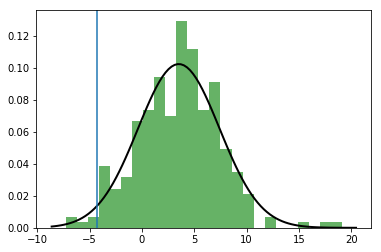

In [80]:

sample_book = average_ratings.loc['014028009X']
sample_book
from scipy.stats import norm
import scipy.stats as st

data = norm.rvs(loc=sample_book['mean'], scale=sample_book['std'], size=int(sample_book['count']))

# Fit a normal distribution to the data:
mu, std = norm.fit(data)
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
interval = st.t.interval(0.95, int(sample_book['count']), loc=sample_book['mean'], scale=sample_book['std'])
# print(interval[0])
print(norm.cdf(interval[0], loc=sample_book['mean'], scale=sample_book['std']))
plt.axvline(interval[0]);

In [63]:
from scipy.stats import norm
# is the probability that X will take a value less than or equal to x.

norm.cdf(interval[0], loc=sample_book['mean'], scale=sample_book['std'])

0.0248930301985469

In [70]:
import scipy.stats

In [158]:
#The simplest model of all. Most highly rated and most frequent books in the dataset

def subset_ratings(ratings, user_id_limit=200, book_rating_limit=100):
    user_counts = ratings['User_ID'].value_counts()
    rating_counts = ratings['Book_Rating'].value_counts()
    simple_ratings = ratings[ratings['User_ID'].isin(list(user_counts[user_counts >= user_id_limit].index))]
    simple_ratings = simple_ratings[ratings['Book_Rating'].isin(list(rating_counts[rating_counts >= book_rating_limit].index))]
    # create interaction dataset 
    simple_interactions = simple_ratings.pivot(index='User_ID', columns='ISBN')['Book_Rating']
    print('Sparsity level: {}'.format(simple_interactions.isnull().sum().sum() / np.multiply(*simple_interactions.shape)))
    return simple_ratings, simple_interactions

simple_ratings, simple_interactions = subset_ratings(ratings, user_id_limit=200, book_rating_limit=100)
simple_interactions.head()

/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Sparsity level: 0.9971933672929102


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User_ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
bones_ratings = simple_interactions['0316666343']
similar_to_bones = simple_interactions.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount'] >= 300].sort_values('pearsonR', ascending=False).head(10)

/home/matt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/matt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


In [120]:
simple_interactions[['0316666343', '0971880107']].values.reshape(2, -1)

array([[nan, nan, nan, ..., nan, nan,  0.],
       [nan, nan, nan, ..., nan, nan, nan]])

In [121]:
np.corrcoef(simple_interactions.T, simple_interactions[['0316666343', '0971880107']].values.reshape(2, -1))

MemoryError: 

In [ ]:
# '0316666343'
corr_df = pd.DataFrame()

for value in ['0316666343', '0971880107']:
    new_per = simple_interactions.corrwith(simple_interactions[value])
    column = ['pearsonR_' + str(value)]
    corr_df[column] = new_per

corr_df.dropna(inplace=True)
corr_df = corr_df.join(average_ratings['count'])
corr_df[corr_df['count'] >= 300].sort_values('pearsonR', ascending=False).head(10)

In [111]:
# '0316666343'
corr_df = pd.DataFrame(simple_interactions.corrwith(simple_interactions['0316666343']), columns=['pearsonR'])
corr_df.dropna(inplace=True)
corr_df.head()
corr_df = corr_df.join(average_ratings['count'])
corr_df[corr_df['count'] >= 300].sort_values('pearsonR', ascending=False).head(10)

/home/matt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/matt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,pearsonR,count
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


ISBN
3379015180    1.0
3522128001    1.0
3596224284    1.0
dtype: float64

In [14]:
user_ratings = ratings[ratings.User_ID == sample_user]
top_book = user_ratings[user_ratings.Book_Rating == user_ratings.Book_Rating.max()]
top_book_isbn = top_book.ISBN.values[0]

top_book_name = books.Book_Title[books.ISBN == top_book_isbn].values[0]
top_book_author = books.Book_Author[books.ISBN == top_book_isbn].values[0]

col = simple_interactions[top_book_isbn]
similar_books = simple_interactions.corrwith(col)
corr_df = pd.DataFrame(similar_books, columns=['pearsonR'])
corr_df.dropna(inplace=True)
corr_df.head()

/home/matt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/matt/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,pearsonR
ISBN,


In [ ]:
corr_df.dropna(inplace=True)
corr_summary = corr_df.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount'] >= 300].sort_values('pearsonR', ascending=False).head(10)

### Ignore the cold start problem for now 

In [36]:

from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')


#Making necesarry imports
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os, sys
import re
import seaborn as sns

metric='cosine'
k=10
#This function finds k similar users given the user_id and ratings matrix 
#These similarities are same as obtained via using pairwise_distances
def findksimilarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
            
    return similarities,indices

#This function predicts rating for specified user-item combination based on user-based approach
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

# predict_userbased(11676,'0001056107',ratings_matrix);
# Predicted rating for user 11676 -> item 0001056107: 2

    
# Item-based Recommendation Systems


#This function finds k similar items given the item_id and ratings matrix

def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices

# similarities,indices=findksimilaritems('0001056107',ratings_matrix)

#This function predicts the rating for specified user-item combination based on item-based approach
def predict_itembased(user_id, item_id, ratings, metric = metric, k=k):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = int(round(wtd_sum/sum_wt))
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below //code has been validated without the code snippet below, below snippet is to avoid negative
    #predictions which might arise in case of very sparse datasets when using correlation metric
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10

    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction)      )
    
    return prediction

# prediction = predict_itembased(11676,'0001056107',ratings_matrix)


@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation. 
#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already
def recommendItem(user_id, ratings, metric=metric):  
    print('FFF')
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(book_ratings.index.values))))
    else:    
        ids = ['Item-based (correlation)','Item-based (cosine)','User-based (correlation)','User-based (cosine)']
        select = widgets.Dropdown(options=ids, value=ids[0],description='Select approach', width='1000px')
        def on_change(change):
            clear_output(wait=True)
            prediction = []            
            if change['type'] == 'change' and change['name'] == 'value':            
                if (select.value == 'Item-based (correlation)') | (select.value == 'User-based (correlation)') :
                    metric = 'correlation'
                else:                       
                    metric = 'cosine'   
                with suppress_stdout():
                    if (select.value == 'Item-based (correlation)') | (select.value == 'Item-based (cosine)'):
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                    else:
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_userbased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                prediction = pd.Series(prediction)
                prediction = prediction.sort_values(ascending=False)
                recommended = prediction[:10]
                print("As per {0} approach....Following books are recommended...".format(select.value))
                for i in range(len(recommended)):
                     print("{0}. {1}".format(i+1,books.Book_Title[recommended.index[i]].encode('utf-8')))                        
        select.observe(on_change)
        display(select)

In [37]:
recommendItem(6242, book_ratings)